### Import Libraries

In [81]:
import pandas as pd
import numpy as np
from matplotlib.widgets import Cursor
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go 
from plotly.offline import init_notebook_mode,iplot,plot
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler

init_notebook_mode(connected=True) 
%matplotlib inline

> **Note**: temperature change is with respect to a baseline climatology, corresponding to the period 1951–1980 (as said within [the documentation](https://www.fao.org/faostat/en/#data/ET)).

## I. Load, and Explore the Data

1. This notebook is going to analyze Temperature dataset which contains 14 columns and those columns are Domain, Area, Element, months, Year, Unit, Value, Flag and their codes. Each row of Domain column contains the value "Temperature change" which specify that all the row contains change of the teprature in each year.
2. Area: this column store the each country name.
3. Element: all the rows contains this value 'Temperature change'
4. months: row contains this values 'Dec–Jan–Feb', 'Mar–Apr–May', 'Jun–Jul–Aug', 'Sep–Oct–Nov', 'Meteorological year'
5. Year: contains year values in each rows
6. Unis: since the measure of change in Temperature is stored in this column so unit celcius(C) is used
7. Flag: contains this values "Calculated Data" and "Data Not Available". And during this analysis, only 'Calculated Data' is used.

In [82]:
# Import the data
temp = pd.read_csv("temperature_change_data_11-29-2021.csv")
temp.columns

C:\Users\adadi\anaconda3\envs\HPOmenChallenge\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning:

Columns (0,1,2,3,5,7,10,12,13) have mixed types.Specify dtype option on import or set low_memory=False.



Index(['Domain Code', 'Domain', 'Area Code (ISO3)', 'Area', 'Element Code',
       'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

1. filtering out null values <br> dataframe does contains any null values
2. excluding rows which contans flag descrition values "Data not available"

In [83]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       67625 non-null  object 
 1   Domain            67625 non-null  object 
 2   Area Code (ISO3)  67625 non-null  object 
 3   Area              67625 non-null  object 
 4   Element Code      67625 non-null  float64
 5   Element           67625 non-null  object 
 6   Months Code       67625 non-null  float64
 7   Months            67625 non-null  object 
 8   Year Code         67625 non-null  float64
 9   Year              67625 non-null  float64
 10  Unit              67625 non-null  object 
 11  Value             65331 non-null  float64
 12  Flag              67625 non-null  object 
 13  Flag Description  67625 non-null  object 
dtypes: float64(5), object(9)
memory usage: 112.0+ MB


In [84]:
temp=temp[temp['Flag']=='Fc']
len(temp)

65331

1. In each year the change in Temperature measured in each quarter starting from 'Dec–Jan–Feb', to  'Sep–Oct–Nov'.
2. But that has also been measured in  'Meteorological year'
3. here this analysis should be made by observing each quarter and meteorological year separately 
4. But in this analysis only meteorological year is chosen for Temperature change analysis.

In [85]:
temp['Months'].value_counts()

Dec–Jan–Feb            13080
Mar–Apr–May            13077
Jun–Jul–Aug            13069
Sep–Oct–Nov            13061
Meteorological year    13044
Name: Months, dtype: int64

In [86]:
temp=temp[temp['Months']=='Meteorological year']

In [87]:
temp.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
240,ET,Temperature change,AFG,Afghanistan,7271.0,Temperature change,7020.0,Meteorological year,1961.0,1961.0,°C,-0.121,Fc,Calculated data
241,ET,Temperature change,AFG,Afghanistan,7271.0,Temperature change,7020.0,Meteorological year,1962.0,1962.0,°C,-0.171,Fc,Calculated data
242,ET,Temperature change,AFG,Afghanistan,7271.0,Temperature change,7020.0,Meteorological year,1963.0,1963.0,°C,0.841,Fc,Calculated data
243,ET,Temperature change,AFG,Afghanistan,7271.0,Temperature change,7020.0,Meteorological year,1964.0,1964.0,°C,-0.779,Fc,Calculated data
244,ET,Temperature change,AFG,Afghanistan,7271.0,Temperature change,7020.0,Meteorological year,1965.0,1965.0,°C,-0.254,Fc,Calculated data


1. In the dataset there is total 13525 no of rows. 
2. distribution of year columns values is from 1961 to 2020
3. distribution of change in Temperature(Values) is from minimum 0.491524 to maximum  8.206000.<br>median value of the distribution is  0.410000 and standard deviation is 0.820116

In [88]:
temp[['Year','Value']].describe()

,Year,Value
count,13044.000000,13044.000000
mean,1991.147347,0.491651
std,17.321926,0.649765
min,1961.000000,-3.251000
25%,1976.000000,0.032000
50%,1992.000000,0.415500
75%,2006.000000,0.882000
max,2020.000000,5.328000


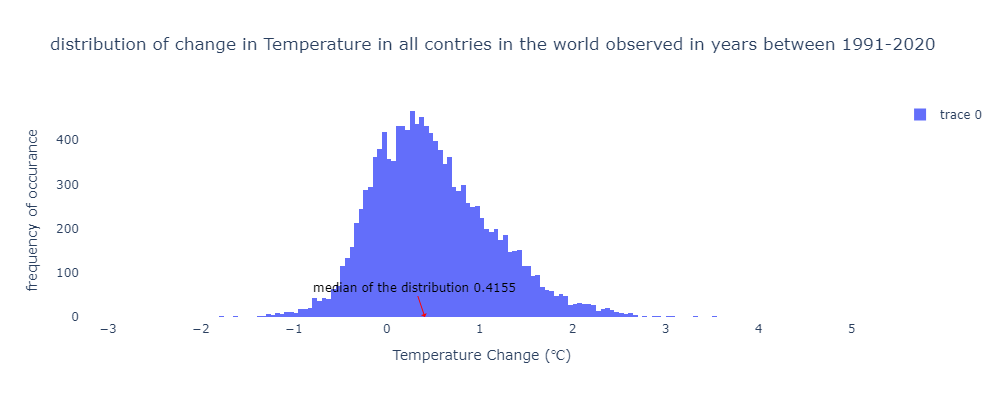

In [89]:
fig = go.Figure(data=[go.Histogram(x=temp['Value'],hovertemplate='%{x}: change in Temperature')],
                layout=go.Layout(yaxis=dict(title='frequency of occurance '),xaxis=dict(title="Temperature Change (℃)")))
fig.update_layout(
    height=400,
    width=1000,
    title_text='distribution of change in Temperature in all contries in the world observed in years between 1991-2020 ',
    paper_bgcolor='white',
    plot_bgcolor='white'
)
fig.add_annotation(x=0.41, y=0,
            text="median of the distribution 0.4155",
            font=dict(color='black'),
            arrowcolor='red',
            showarrow=True,
            arrowhead=1)
fig.update_layout(showlegend=True)
fig.show('png')





1. in this dataset 247 different countries are there.
2. and there are 80 countries which have  less than 60 no of year of observation 
3. here Temperature data is considered from year 1961 to 2020 so every country supposed to have 60 no of data, because 60years*(1 meteorological year obs.)=60

In [90]:
AreaWithLessData=(temp[['Area','Area Code (ISO3)','Value']].groupby(['Area','Area Code (ISO3)']).count() )
def minYear(row):
    # print(row)
    areaCode=row['Area Code (ISO3)']
    minyear=temp[temp['Area Code (ISO3)']==areaCode].Year.min()
    return minyear
def maxYear(row):
    areaCode=row['Area Code (ISO3)']
    maxyear=temp[temp['Area Code (ISO3)']==areaCode].Year.max()
    return maxyear
def hovertext(row):
    return 'AreaName:'+str(row["Area"])+'<br>NoOfObs:'+str(row["Value"])+'<br>StartYearOfObs:'+str(row["MinYear"])+'<br>EndYearOfObs:'+str(row["MaxYear"])    
AreaWithLessData=AreaWithLessData.reset_index()
AreaWithLessData['MinYear']=AreaWithLessData.apply(minYear,axis=1)
AreaWithLessData['MaxYear']=AreaWithLessData.apply(maxYear,axis=1)
AreaWithLessData['hovertext']=AreaWithLessData.apply(hovertext,axis=1)
AreaWithLessData.sort_values('Value',ascending=False)

,Area,Area Code (ISO3),Value,MinYear,MaxYear,hovertext
0,Afghanistan,AFG,60,1961.0,2020.0,AreaName:Afghanistan<br>NoOfObs:60<br>StartYea...
132,Mali,MLI,60,1961.0,2020.0,AreaName:Mali<br>NoOfObs:60<br>StartYearOfObs:...
135,Martinique,MTQ,60,1961.0,2020.0,AreaName:Martinique<br>NoOfObs:60<br>StartYear...
136,Mauritania,MRT,60,1961.0,2020.0,AreaName:Mauritania<br>NoOfObs:60<br>StartYear...
137,Mauritius,MUS,60,1961.0,2020.0,AreaName:Mauritius<br>NoOfObs:60<br>StartYearO...
...,...,...,...,...,...,...
144,Montenegro,MNE,15,2006.0,2020.0,AreaName:Montenegro<br>NoOfObs:15<br>StartYear...
194,Serbia,SRB,15,2006.0,2020.0,AreaName:Serbia<br>NoOfObs:15<br>StartYearOfOb...
195,Serbia and Montenegro,SCG,14,1992.0,2005.0,AreaName:Serbia and Montenegro<br>NoOfObs:14<b...
208,Sudan,SDN,10,2011.0,2020.0,AreaName:Sudan<br>NoOfObs:10<br>StartYearOfObs...







1. but some of the country have less than 60 no of years of observation  because either they are divided into certain no of small small countries, or their name has changed, or some of the coutries are newly  invented.
2. for example in 1991, soviet union USSR, whose code name is 228 are divided into small small countris and a large country, which are Armenia, Azerbaijan, Belarus, Estonia, Georgia, Kazakhstan, Kyrgyzstan, Latvia, Lithuania, Moldova, Russia, Tajikistan, Turkmenistan, Ukraine, and Uzbekistan.
3. In Africa coninent sudan and south sudan has evolved by dividing sudan(former) in 2011
4. Ethiopia PDR has changed to Ethiopia in 1993

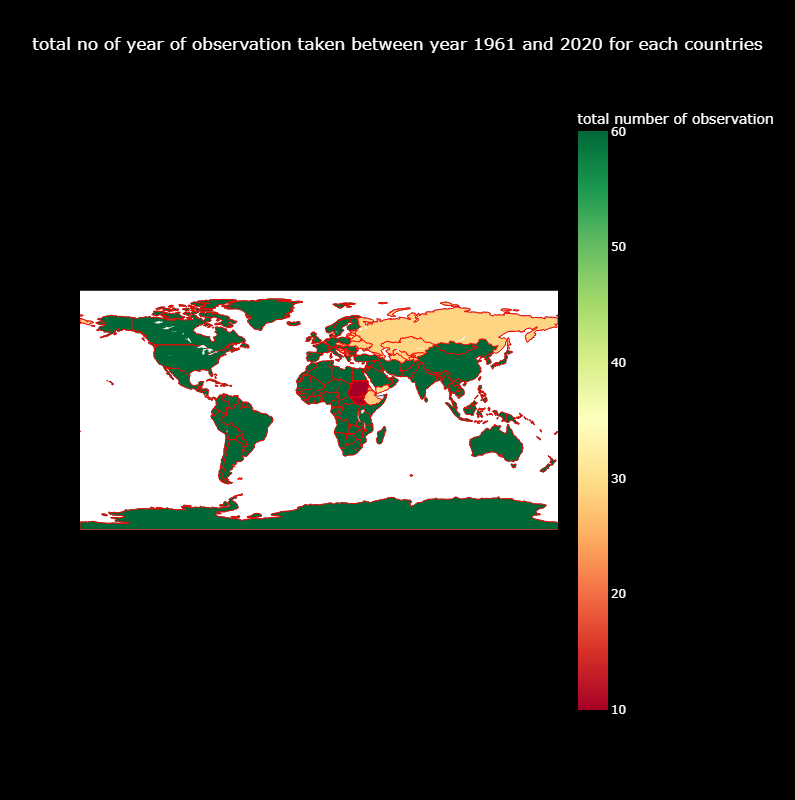

In [91]:
title = 'total no of year of observation taken between year 1961 and 2020 for each countries'
layout1 = go.Layout(title = {'text' : title, 
                            'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'white'},
                   width=1000, height=800, plot_bgcolor="black", paper_bgcolor="black",
                    
                   geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular')
                  )

# Create the figure
fig1 = go.Figure(layout = layout1)

trace2 = go.Choropleth(
    locations = AreaWithLessData['Area Code (ISO3)'],
    z = AreaWithLessData['Value'],
    text=AreaWithLessData['hovertext'],
    colorscale = 'RdYlGn',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='red',
    marker_line_width=1,
    colorbar_tickprefix = '',
    colorbar_title = 'total number of observation',
)
fig1.add_trace(trace2)

fig1.show()

these are the Coutries or Area which has less than 60 no of year of observation.

In [92]:
AreaWithLessData[AreaWithLessData.Value<60].sort_values('Value')['Area'].values

array(['South Sudan', 'Sudan', 'Serbia and Montenegro', 'Montenegro',
       'Serbia', 'Turks and Caicos Islands', 'Nauru', 'Belgium',
       'Luxembourg', 'Falkland Islands (Malvinas)', 'Palau', 'Eritrea',
       'Midway Island', 'Czechia', 'Slovakia', 'Ethiopia',
       'North Macedonia', 'Lithuania', 'Latvia', 'Kyrgyzstan',
       'Republic of Moldova', 'Slovenia', 'Tajikistan', 'Georgia',
       'Russian Federation', 'Niue', 'Kazakhstan', 'Estonia', 'Armenia',
       'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Ukraine',
       'Uzbekistan', 'Turkmenistan', 'Croatia',
       'Pacific Islands Trust Territory', 'Marshall Islands',
       'Micronesia (Federated States of)', 'Tokelau', 'Yugoslav SFR',
       'Yemen', 'USSR', 'Ethiopia PDR', 'Czechoslovakia', 'Burundi',
       'Rwanda', 'Christmas Island', 'Belgium-Luxembourg', 'Wake Island',
       'Timor-Leste', 'Aruba', 'Pitcairn', 'Costa Rica', 'Sudan (former)',
       'Cayman Islands', 'South Georgia and the South Sandwich I

## II. Prepare the Data

1. filtering temp dataframe
2. for Temperature analysis Months column value Meteorological year is selected
3. and flag description value only 'calculated data' are selected for analysis
4. only four column are selected which is sufficient to make all the analysis and those are Area, year, Area Code (ISO3), value
5. Area: country name
6. year: observed year
7. Area Code (ISO3): area/country code
8. Value: change in Temperature value

In [93]:
filteredData=temp[(temp['Flag']=='Fc') &
                (temp['Months']=='Meteorological year')]
filteredData=filteredData.groupby(['Area','Year','Area Code (ISO3)'])[['Value']].mean()
filteredData.reset_index(inplace=True)
filteredData

,Area,Year,Area Code (ISO3),Value
0,Afghanistan,1961.0,AFG,-0.121
1,Afghanistan,1962.0,AFG,-0.171
2,Afghanistan,1963.0,AFG,0.841
3,Afghanistan,1964.0,AFG,-0.779
4,Afghanistan,1965.0,AFG,-0.254
...,...,...,...,...
13039,Zimbabwe,2016.0,ZWE,1.470
13040,Zimbabwe,2017.0,ZWE,0.443
13041,Zimbabwe,2018.0,ZWE,0.747
13042,Zimbabwe,2019.0,ZWE,1.359


## III Analysis

### III.a Line Plot, Representing Change in Temperature on Selected Areas, which are "China", "Germany", "Japan", "United States of America"

In [94]:
# Countries to keep
areas_to_keep = ["China", "Germany", "Japan", "United States"]
filteredData=filteredData.replace('United States of America','United States')
filteredData=filteredData.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom')
sel_are_df=filteredData[filteredData['Area'].isin(areas_to_keep)].reset_index(drop=True)
sel_are_df.head()

,Area,Year,Area Code (ISO3),Value
0,China,1961.0,CHN,0.266
1,China,1962.0,CHN,-0.134
2,China,1963.0,CHN,0.292
3,China,1964.0,CHN,-0.020
4,China,1965.0,CHN,0.081


[-1.085]


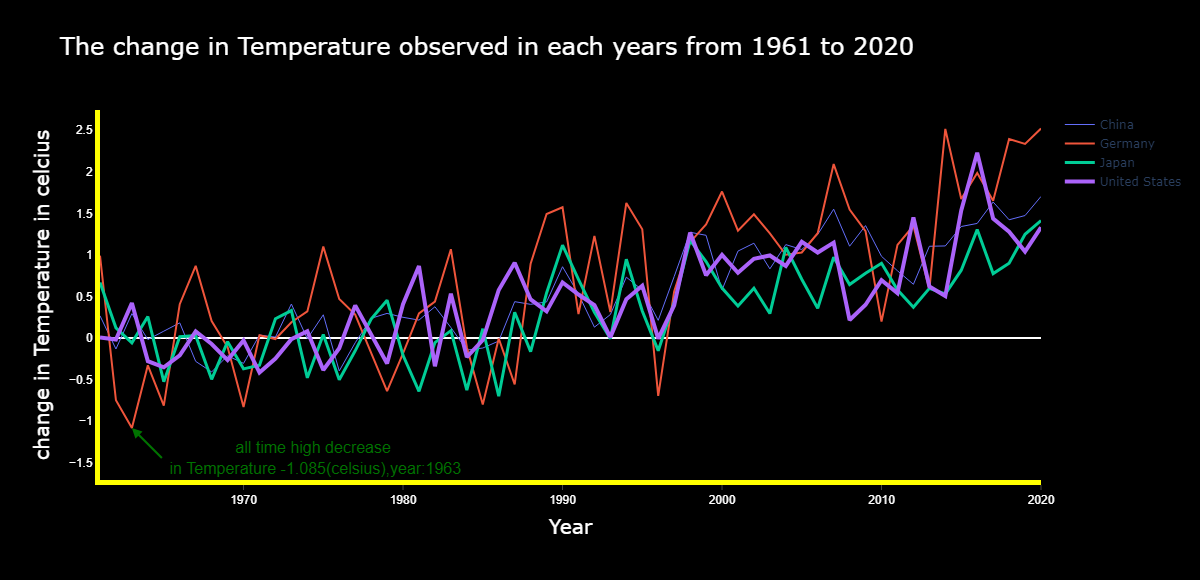

In [95]:
fig = go.Figure()
for i,Area in enumerate( sel_are_df.Area.unique()):
    fig.add_trace(go.Scatter(x=sel_are_df[sel_are_df['Area']==Area].Year, y=sel_are_df[sel_are_df['Area']==Area].Value,
                    mode='lines',
                    name=Area,
                    line=dict( width=i+1),
                            connectgaps=True,
                            line_shape='linear'
                            ))
fig.update_layout(title='The change in Temperature observed in each years from 1961 to 2020',
                    titlefont=dict(
                                    size=24,
                                    color='white'
                                    ),
                    xaxis_title='Year',
                    yaxis_title='change in Temperature in celcius',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=580,
                    width=1200
                    )
fig.update_layout(
xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='yellow',
        linewidth=5,
        ticks='outside',
        tickfont=dict(
                    family='Arial',
                    size=12,
                    color='white',
                    ),
        titlefont=dict(
                    size=20,
                    color='white'
                    )
                    ),
yaxis=dict(
    tickfont=dict(
                family='Arial',
                size=12,
                color='white',
                ),
    titlefont=dict(
                size=20,
                color='white'
                ),
    linecolor='yellow',
    linewidth=5,
    showgrid=False,
    zeroline=True,
    showline=True,
    showticklabels=True,
    ),
    autosize=True,
    margin=dict(
                autoexpand=True,
                l=100,
                r=100,
                t=110,
                b=100
                ),
    showlegend=True,
    # plot_bgcolor="black"
    )
annotations=[]
mintemp=sel_are_df[sel_are_df['Value']==sel_are_df['Value'].min()]
print(mintemp.Value.values,)
annotations.append(dict( x=mintemp.Year.values[0],
                        y=mintemp.Value.values[0],
                        xref='x',
                        yref='y',
                        xanchor='left',
                        yanchor='middle',
                        align='center',
                        text='all time high decrease<br> in Temperature -1.085(celsius),year:1963',
                        font=dict(family='Arial',
                                    size=16,
                                    color='green'),
                        showarrow=True,
                        arrowhead=2,
                        arrowsize=1,
                        arrowwidth=2,
                        arrowcolor='green',
                        ax=30,
                        ay=30,
                        bordercolor="black",
                        borderwidth=1,
                        borderpad=2,
                        bgcolor="black",
                        opacity=0.9
                        ),

                        )

fig.update_layout(annotations=annotations)

fig.show('png')

### III.b Line Plot Representing Avg Change in Temperature(in celsius) of Selected four countries  "China", "Germany", "Japan", "United States of America" from 1961 to 2020

In [96]:
avgSelAreTemp=sel_are_df.groupby(['Year'])[['Value']].mean().reset_index()
avgSelAreTemp.head()

,Year,Value
0,1961.0,0.48200
1,1962.0,-0.19575
2,1963.0,-0.10825
3,1964.0,-0.09325
4,1965.0,-0.40375


1. By Incorporating Change in Temperature of four countries, which are China, Germany, Japan, and United States, Avg Change in Temperature are calculated and plotted against each year from 1961 to 2020.  
2. On Avg There is increase in Positive change in Temperature through out the year.
3. 1965 is the year when the avg change in Temperature was minimum, means avg Temperature decreases by .40375 degree celsius in that year.
4. 1970 and 1984 are the years when the change in Temperature is also minimum,which are near to .3855 and .2797 respectively.


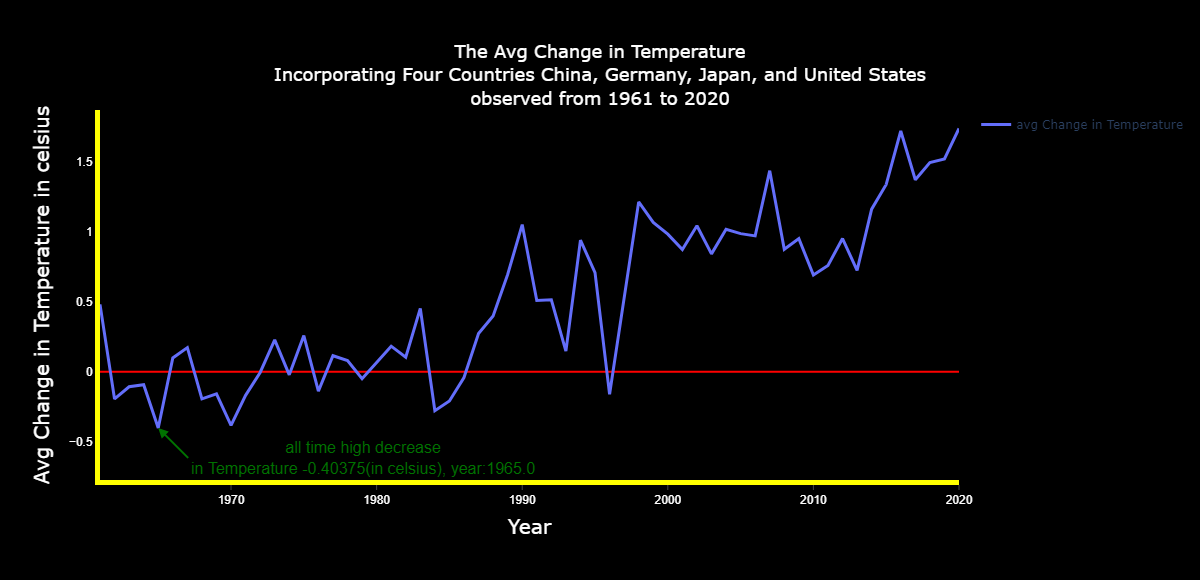

In [97]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=avgSelAreTemp.Year, y=avgSelAreTemp.Value,
                mode='lines',
                name='avg Change in Temperature',
                line=dict( width=3),
                        connectgaps=True,
                        line_shape='linear'
                        ))
fig.update_layout(title='The Avg Change in Temperature<br>Incorporating Four Countries China, Germany, Japan, and United States<br>observed from 1961 to 2020',
                    titlefont=dict(
                                    size=18,
                                    color='white'
                                    ),
                   title_x=0.5, title_y=0.9,
                    xaxis_title='Year',
                    yaxis_title='Avg Change in Temperature in celsius',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=580,
                    width=1200
                    )
fig.update_layout(
                    xaxis=dict(
                            showline=True,
                            showgrid=False,
                            showticklabels=True,
                            linecolor='yellow',
                            linewidth=5,
                            ticks='outside',
                            tickfont=dict(
                                        family='Arial',
                                        size=12,
                                        color='white',
                                        ),
                            titlefont=dict(
                                        size=20,
                                        color='white'
                                        )
                                        ),
                    yaxis=dict(
                        tickfont=dict(
                                    family='Arial',
                                    size=12,
                                    color='white',
                                    ),
                        titlefont=dict(
                                    size=20,
                                    color='white'
                                    ),
                        linecolor='yellow',
                        linewidth=5,
                        showgrid=False,
                        zeroline=True,
                        zerolinecolor='red',
                        showline=True,
                        showticklabels=True,
                        ),
                        autosize=True,
                        margin=dict(
                                    autoexpand=True,
                                    l=100,
                                    r=100,
                                    t=110,
                                    b=100
                                    ),
                        showlegend=True,
                        # plot_bgcolor="black"
                        )
annotations=[]
mintemp=avgSelAreTemp[avgSelAreTemp['Value']==avgSelAreTemp['Value'].min()]
# print(mintemp.Value.values,)
annotations.append(dict( x=mintemp.Year.values[0],
                        y=mintemp.Value.values[0],
                        xref='x',
                        yref='y',
                        xanchor='left',
                        yanchor='middle',
                        align='center',
                        text=f'all time high decrease<br>in Temperature {mintemp.Value.values[0]}(in celsius), year:{mintemp.Year.values[0]}',
                        font=dict(family='Arial',
                                    size=16,
                                    color='green'),
                        showarrow=True,
                        arrowhead=2,
                        arrowsize=1,
                        arrowwidth=2,
                        arrowcolor='green',
                        ax=30,
                        ay=30,
                        bordercolor="black",
                        borderwidth=1,
                        borderpad=2,
                        bgcolor="black",
                        opacity=0.9
                        ),

                        )

fig.update_layout(annotations=annotations)

fig.show('png')

### III.c Line Plot Representing Change in Temperature(in celsius) of 7 biggest economy of The World "India", "France", "China", "Germany", "Japan","United Kingdom", "United States of America" from 1961 to 2020

In [98]:
top7economy=['India','China','France','Germany','Japan','United States','United Kingdom']
sel_7_economy=filteredData[filteredData['Area'].isin(top7economy)]
sel_7_economy.head()

,Area,Year,Area Code (ISO3),Value
2340,China,1961.0,CHN,0.266
2341,China,1962.0,CHN,-0.134
2342,China,1963.0,CHN,0.292
2343,China,1964.0,CHN,-0.020
2344,China,1965.0,CHN,0.081


1. In this line plot, change in temperature of  7 top economy of the world are analyzed.
2. through out the years from 1961 to 2020 the change in temperature has increases positively.
3. most of the top economy conuntry like India, china, united states, france, united kingdom, and japan has seen significant drop in temperature from 1962 to 1990.
4. but Germany has faced decreased in temperature last time in 1996


[-1.085]


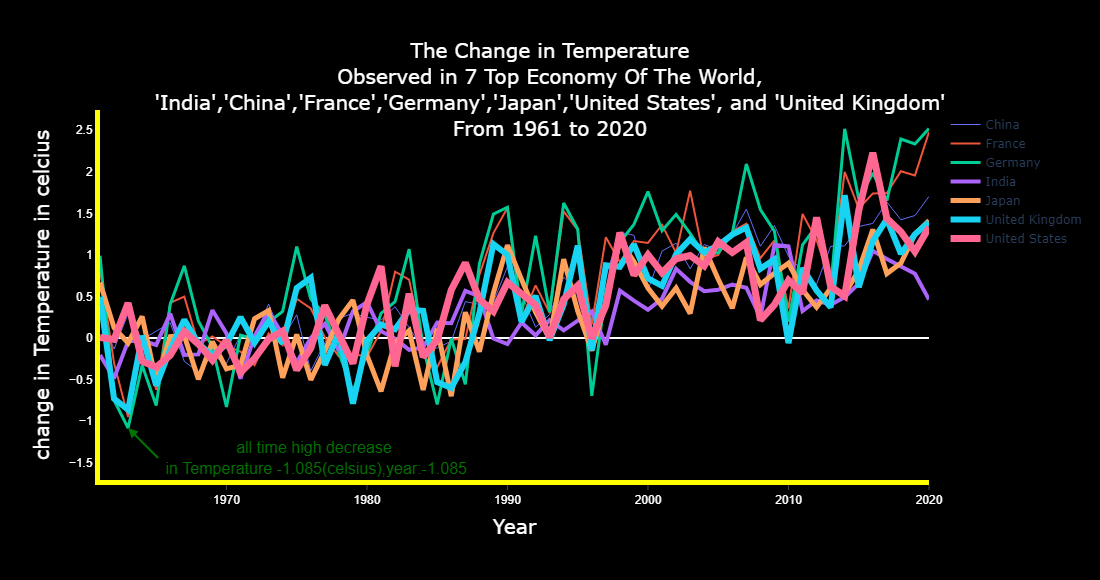

In [99]:
fig = go.Figure()
for i,Area in enumerate( sel_7_economy.Area.unique()):
    fig.add_trace(go.Scatter(x=sel_7_economy[sel_7_economy['Area']==Area].Year, y=sel_7_economy[sel_7_economy['Area']==Area].Value,
                    mode='lines',
                    name=Area,
                    line=dict( width=i+1),
                            connectgaps=True,
                            line_shape='linear'
                            ))
fig.update_layout(title="The Change in Temperature<br>Observed in 7 Top Economy Of The World,<br>'India','China','France','Germany','Japan','United States', and 'United Kingdom'<br>From 1961 to 2020",
                    titlefont=dict(
                                    size=20,
                                    color='white'
                                    ),
                   title_x=0.5, title_y=0.9,
                  
                    xaxis_title='Year',
                    yaxis_title='change in Temperature in celcius',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=580,
                    width=1100
                    )
fig.update_layout(
xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='yellow',
        linewidth=5,
        ticks='outside',
        tickfont=dict(
                    family='Arial',
                    size=12,
                    color='white',
                    ),
        titlefont=dict(
                    size=20,
                    color='white'
                    )
                    ),
yaxis=dict(
    tickfont=dict(
                family='Arial',
                size=12,
                color='white',
                ),
    titlefont=dict(
                size=20,
                color='white'
                ),
    linecolor='yellow',
    linewidth=5,
    showgrid=False,
    zeroline=True,
    showline=True,
    showticklabels=True,
    ),
    autosize=True,
    margin=dict(
                autoexpand=True,
                l=100,
                r=100,
                t=110,
                b=100
                ),
    showlegend=True,
    # plot_bgcolor="black"
    )
annotations=[]
mintemp=sel_7_economy[sel_7_economy['Value']==sel_7_economy['Value'].min()]
print(mintemp.Value.values,)
annotations.append(dict( x=mintemp.Year.values[0],
                        y=mintemp.Value.values[0],
                        xref='x',
                        yref='y',
                        xanchor='left',
                        yanchor='middle',
                        align='center',
                        text=f'all time high decrease<br> in Temperature {mintemp.Value.values[0]}(celsius),year:{mintemp.Value.values[0]}',
                        font=dict(family='Arial',
                                    size=16,
                                    color='green'),
                        showarrow=True,
                        arrowhead=2,
                        arrowsize=1,
                        arrowwidth=2,
                        arrowcolor='green',
                        ax=30,
                        ay=30,
                        bordercolor="black",
                        borderwidth=1,
                        borderpad=2,
                        bgcolor="black",
                        opacity=0.9
                        ),

                        )

fig.update_layout(annotations=annotations)

fig.show('png')

this heatmap is the another way to visualize the change in temperature in each 7 top economic countries from 1961 to 2020.
1. here density,darkness, and lightness of the color represent the change in temperature in each countries and years.
2. darkest violet color represent highest drop in temperature.
3. light yellow color represent highest increase in temperature.
4. most of the dark region, which means high drop in temperature, has been seen in between 1962 to 1987.
5. in between 1962 to 1996 Germany had seen drop of temperature more number of times in compared to others and in around 2020 this coutry has high increase in temperature.
6. india and united states has seen drop and increase in temperature very less time.
7. around 2020 France had seen increasing in temperature in continuously.

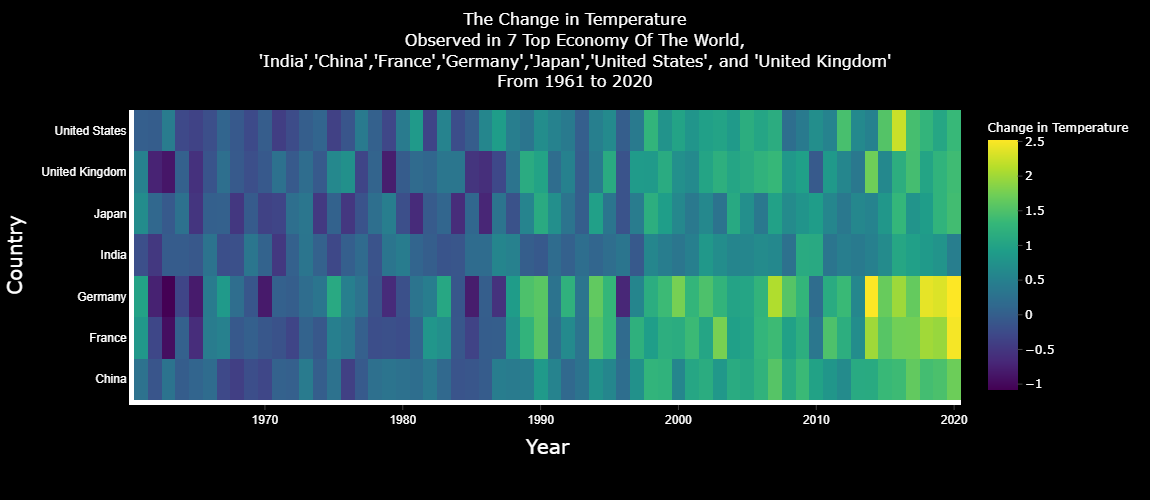

In [100]:
# for heat map
year=list(sel_7_economy.sort_values('Year').Year.unique())
area=list(sel_7_economy.sort_values('Area').Area.unique())

tmpChange=[]
for Area in area:
    tmpChange.append(sel_7_economy[sel_7_economy['Area']==Area].sort_values('Year').Value.values.tolist())
fig = go.Figure(data=go.Heatmap(
                   z=tmpChange,
                   x=year,
                   y=area,
                    type = 'heatmap',
                    hoverongaps = True,
                    colorscale = 'Viridis',
                colorbar=dict(
                    title='Change in Temperature',
                    titlefont=dict(
                    color='white',
                        size=12,
                        
                    ),
                    # nticks=10,
                    ticks='outside',
                    ticklen=5,
                    tickwidth=1,
                    showticklabels=True,
                    tickangle=0,
                    tickfont_size=12,
                    tickfont_color='white'
                )

))
fig.update_layout(title="The Change in Temperature<br>Observed in 7 Top Economy Of The World,<br>'India','China','France','Germany','Japan','United States', and 'United Kingdom'<br>From 1961 to 2020",
                    titlefont=dict(
                                    size=16,
                                    color='white'
                                    ),
                   title_x=0.5, title_y=0.95,
                  
                    xaxis_title='Year',
                    yaxis_title='Country',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=500,
                    width=1150
                    )

fig.update_layout(
xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='white',
        linewidth=5,
        ticks='outside',
        tickfont=dict(
                    family='Arial',
                    size=12,
                    color='white',
                    ),
        titlefont=dict(
                    size=20,
                    color='white'
                    )
                    ),
yaxis=dict(
    tickfont=dict(
                family='Arial',
                size=12,
                color='white',
                ),
    titlefont=dict(
                size=20,
                color='white'
                ),
    linecolor='white',
    linewidth=5,
    showgrid=False,
    zeroline=False,
    showline=True,
    showticklabels=True,
    ),
    autosize=True,
    margin=dict(
                autoexpand=True,
                l=100,
                r=100,
                t=110,
                b=100
                ),
    showlegend=True,
    # plot_bgcolor="black"
    )
fig.show('png')


In [101]:
Avgsel_7_economy=sel_7_economy.groupby(['Year'])[['Value']].mean().reset_index()
Avgsel_7_economy.head()

,Year,Value
0,1961.0,0.435000
1,1962.0,-0.329000
2,1963.0,-0.327714
3,1964.0,-0.050143
4,1965.0,-0.414143


### III.d Line Plot Representing Avg Change in Temperature(in celsius) Incorporating 7 biggest economy of The World "India", "France", "China", "Germany", "Japan","United Kingdom", "United States of America" from 1961 to 2020

1. The avg change in Temperature incorporating 7 top economy of the world, has increased through out the years from 1961 to 2020.
2. From 1962 to 1996 avg  temperature has droped 14 time but after that there is only increase in avg temperature.
3. In 1965 is the year, when the avg change in temperature has droped to -0.41 degree celsius. it means the avg temperature of these 7 top economy has droped by .41 degree celsius on this year.

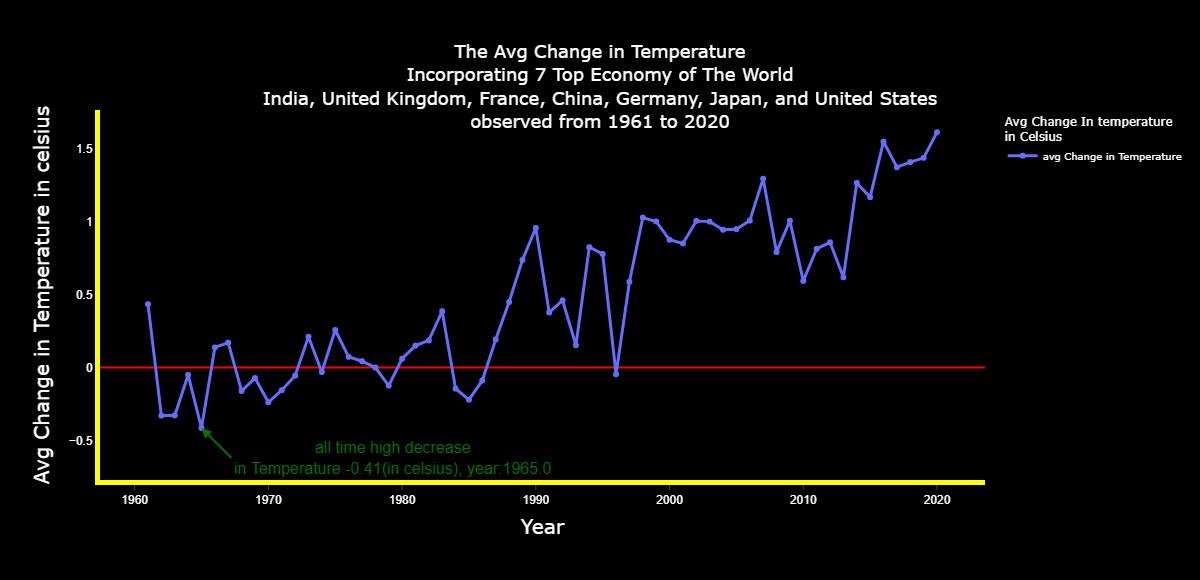

In [102]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=Avgsel_7_economy.Year, y=Avgsel_7_economy.Value,
                mode='markers+lines',
                name='avg Change in Temperature',
                line=dict( width=3),
                        connectgaps=True,
                        line_shape='linear',
                        
                        )
              
             )
fig.update_layout(title='The Avg Change in Temperature<br>Incorporating 7 Top Economy of The World<br>India, United Kingdom, France, China, Germany, Japan, and United States<br>observed from 1961 to 2020',
                    titlefont=dict(
                                    size=18,
                                    color='white'
                                    ),
                   title_x=0.5, title_y=0.9,
                    xaxis_title='Year',
                    yaxis_title='Avg Change in Temperature in celsius',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=580,
                    width=1200
                    )
fig.update_layout(legend=dict(title='Avg Change In temperature<br>in Celsius',
                              font=dict(color='white',
                              size=10)
                             ))
fig.update_layout(
                    xaxis=dict(
                            showline=True,
                            showgrid=False,
                            showticklabels=True,
                            linecolor='yellow',
                            linewidth=5,
                            ticks='outside',
                            tickfont=dict(
                                        family='Arial',
                                        size=12,
                                        color='white',
                                        ),
                            titlefont=dict(
                                        size=20,
                                        color='white'
                                        )
                                        ),
                    yaxis=dict(
                        tickfont=dict(
                                    family='Arial',
                                    size=12,
                                    color='white',
                                    ),
                        titlefont=dict(
                                    size=20,
                                    color='white'
                                    ),
                        linecolor='yellow',
                        linewidth=5,
                        showgrid=False,
                        zeroline=True,
                        zerolinecolor='red',
                        showline=True,
                        showticklabels=True,
                        ),
                        autosize=True,
                        margin=dict(
                                    autoexpand=True,
                                    l=100,
                                    r=100,
                                    t=110,
                                    b=100
                                    ),
                        showlegend=True,
                        # plot_bgcolor="black"
                        )
annotations=[]
mintemp=Avgsel_7_economy[Avgsel_7_economy['Value']==Avgsel_7_economy['Value'].min()]
# print(mintemp.Value.values,)
annotations.append(dict( x=mintemp.Year.values[0],
                        y=mintemp.Value.values[0],
                        xref='x',
                        yref='y',
                        xanchor='left',
                        yanchor='middle',
                        align='center',
                        text=f'all time high decrease<br>in Temperature {round(mintemp.Value.values[0],2)}(in celsius), year:{mintemp.Year.values[0]}',
                        font=dict(family='Arial',
                                    size=16,
                                    color='green'),
                        showarrow=True,
                        arrowhead=2,
                        arrowsize=1,
                        arrowwidth=2,
                        arrowcolor='green',
                        ax=30,
                        ay=30,
                        bordercolor="black",
                        borderwidth=1,
                        borderpad=2,
                        bgcolor="black",
                        opacity=0.9
                        ),

                        )

fig.update_layout(annotations=annotations)

fig.show('png')

## IV What Are The Areas With Biggest and Smallest Change In Temperature.

1. In this part of the analysis the top 5 biggest and smallest change in temperature and corresponding Area are traced out and presented in below bubble chat for each year from 1961 to 2020.
2. Change in temprature can be negative(drop in actual temprature) or it can be positve means rise in temprature.
3. In below bubble chart the magnitude of change in temprature are cosidered to trace out countries where rate of temperature change is biggest and smallest.



In [103]:
# first pivot the data where Area will represent index.
# all column will represent each year from 1961 to 2020.
# and corresponding cell will represent  change in temprature.
sel_world_pivot=pd.pivot_table(filteredData,index=['Area','Area Code (ISO3)'],columns=['Year'],values=['Value'])
count=sel_world_pivot.count(axis=1)
mean=sel_world_pivot.mean(axis=1)
std=sel_world_pivot.std(axis=1)
sel_world_pivot['noOfObs']=count
sel_world_pivot['mean_Chng_Temp']=mean
sel_world_pivot['std_Chng_Temp']=std
sel_world_pivot=sel_world_pivot
sel_world_pivot['Value']=abs(sel_world_pivot['Value'])
sel_world_pivot.head()

Value                                     \
Year                            1961.0 1962.0 1963.0 1964.0 1965.0 1966.0   
Area           Area Code (ISO3)                                             
Afghanistan    AFG               0.121  0.171  0.841  0.779  0.254  0.172   
Albania        ALB               0.639  0.345  0.078  0.166  0.388  0.553   
Algeria        DZA               0.110  0.042  0.005  0.169  0.176  0.373   
American Samoa ASM               0.042  0.080  0.128  0.178  0.526  0.218   
Andorra        AND               0.744  0.117  0.746  0.315  0.499  0.406   

                                                             ...         \
Year                            1967.0 1968.0 1969.0 1970.0  ... 2014.0   
Area           Area Code (ISO3)                              ...          
Afghanistan    AFG               0.374  0.375  0.490  0.852  ...  0.536   
Albania        ALB               0.082  0.073  0.024  0.127  ...  1.357   
Algeria        DZA               0.020  0.062  0.325  0.130  ...  1.715   
American Samoa ASM               0.342  0.172  0.147  0.033  ...  0.887   
Andorra        AND               0.620  0.013  0.171  0.093  ...  1.868   

                                                                           \
Year                            2015.0 2016.0 2017.0 2018.0 2019.0 2020.0   
Area           Area Code (ISO3)                                             
Afghanistan    AFG               1.166  1.581  1.626  1.682  1.125  0.652   
Albania        ALB               1.703  1.624  1.286  2.189  1.858  1.671   
Algeria        DZA               1.151  1.776  1.537  1.246  1.127  1.943   
American Samoa ASM               0.726  1.256  1.151  0.905  1.255  1.161   
Andorra        AND               1.564  1.845  1.784  1.760  1.800  2.378   

                                noOfObs mean_Chng_Temp std_Chng_Temp  
Year                                                                  
Area           Area Code (ISO3)                                       
Afghanistan    AFG                   60       0.477833      0.683291  
Albania        ALB                   60       0.487817      0.719930  
Algeria        DZA                   60       0.709750      0.705997  
American Samoa ASM                   57       0.422825      0.465335  
Andorra        AND                   60       0.686000      0.753789  

[5 rows x 63 columns]

In [104]:
top5BigChngInTemp=pd.DataFrame(columns=filteredData.columns[:-1])
top5SmallChngInTemp=pd.DataFrame(columns=filteredData.columns[:-1])

filteredDataAbsValue=filteredData
filteredDataAbsValue['ChangeDir']=filteredDataAbsValue['Value'].apply(lambda x: 'increased' if x>0 else "decreased")
filteredDataAbsValue['AbsValue']=abs(filteredData['Value'])
for year in range(1961,2021):
    currdataframe=filteredDataAbsValue[(filteredDataAbsValue.Year==year)].dropna().sort_values('AbsValue',ascending=False)
    top5BigChngInTemp=pd.concat([top5BigChngInTemp,currdataframe.head(5)])
    top5SmallChngInTemp=pd.concat([top5SmallChngInTemp,currdataframe.tail(5)])
    
top5BigChngInTemp.reset_index(drop=True,inplace=True)
top5SmallChngInTemp.reset_index(drop=True,inplace=True)

def hovertemplate(row):
    
    template='country: '+row.Area+'<br>'+'Year: '+str(row.Year)+'<br>'+'AbsChangeInTemp: '+str(row.AbsValue)+'<br>'+"teperature: "+row.ChangeDir
    return template
top5BigChngInTemp['Template']=top5BigChngInTemp.apply(hovertemplate,axis=1)
top5SmallChngInTemp['Template']=top5SmallChngInTemp.apply(hovertemplate,axis=1)

top5BigChngInTemp.head()

,Area,Year,Area Code (ISO3),Value,ChangeDir,AbsValue,Template
0,Finland,1961.0,FIN,1.896,increased,1.896,country: Finland<br>Year: 1961.0<br>AbsChangeI...
1,Sweden,1961.0,SWE,1.577,increased,1.577,country: Sweden<br>Year: 1961.0<br>AbsChangeIn...
2,Poland,1961.0,POL,1.395,increased,1.395,country: Poland<br>Year: 1961.0<br>AbsChangeIn...
3,Norway,1961.0,NOR,1.240,increased,1.240,country: Norway<br>Year: 1961.0<br>AbsChangeIn...
4,Hungary,1961.0,HUN,1.180,increased,1.180,country: Hungary<br>Year: 1961.0<br>AbsChangeI...


In [105]:
top5SmallChngInTemp.head()

,Area,Year,Area Code (ISO3),Value,ChangeDir,AbsValue,Template
0,Antigua and Barbuda,1961.0,ATG,-0.005,decreased,0.005,country: Antigua and Barbuda<br>Year: 1961.0<b...
1,Saint Kitts and Nevis,1961.0,KNA,-0.005,decreased,0.005,country: Saint Kitts and Nevis<br>Year: 1961.0...
2,Montserrat,1961.0,MSR,-0.005,decreased,0.005,country: Montserrat<br>Year: 1961.0<br>AbsChan...
3,Belize,1961.0,BLZ,-0.004,decreased,0.004,country: Belize<br>Year: 1961.0<br>AbsChangeIn...
4,Guatemala,1961.0,GTM,-0.003,decreased,0.003,country: Guatemala<br>Year: 1961.0<br>AbsChang...


In [106]:
s= '''aliceblue, antiquewhite, aqua, aquamarine, azure,
                beige, bisque, black, blanchedalmond, blue,
                blueviolet, brown, burlywood, cadetblue,
                chartreuse, chocolate, coral, cornflowerblue,
                cornsilk, crimson, cyan, darkblue, darkcyan,
                darkgoldenrod, darkgray, darkgrey, darkgreen,
                darkkhaki, darkmagenta, darkolivegreen, darkorange,
                darkorchid, darkred, darksalmon, darkseagreen,
                darkslateblue, darkslategray, darkslategrey,
                darkturquoise, darkviolet, deeppink, deepskyblue,
                dimgray, dimgrey, dodgerblue, firebrick,
                floralwhite, forestgreen, fuchsia, gainsboro,
                ghostwhite, gold, goldenrod, gray, grey, green,
                greenyellow, honeydew, hotpink, indianred, indigo,
                ivory, khaki, lavender, lavenderblush, lawngreen,
                lemonchiffon, lightblue, lightcoral, lightcyan,
                lightgoldenrodyellow, lightgray, lightgrey,
                lightgreen, lightpink, lightsalmon, lightseagreen,
                lightskyblue, lightslategray, lightslategrey,
                lightsteelblue, lightyellow, lime, limegreen,
                linen, magenta, maroon, mediumaquamarine,
                mediumblue, mediumorchid, mediumpurple,
                mediumseagreen, mediumslateblue, mediumspringgreen,
                mediumturquoise, mediumvioletred, midnightblue,
                mintcream, mistyrose, moccasin, navajowhite, navy,
                oldlace, olive, olivedrab, orange, orangered,
                orchid, palegoldenrod, palegreen, paleturquoise,
                palevioletred, papayawhip, peachpuff, peru, pink,
                plum, powderblue, purple, red, rosybrown,
                royalblue, saddlebrown, salmon, sandybrown,
                seagreen, seashell, sienna, silver, skyblue,
                slateblue, slategray, slategrey, snow, springgreen,
                steelblue, tan, teal, thistle, tomato, turquoise,
                violet, wheat, white, whitesmoke, yellow,
                yellowgreen'''
li=s.split(',')
li=[l.replace('\n','') for l in li]
colorArr=[l.replace(' ','') for l in li]
print(len(colorArr))

147


1. In Each year from 1961 to 2020 top five countries selected on the basis of highest change in temperature observation.
2. from below bubble chart x axis representing year, y axis representing observed highest changed in temperature and color of the each bubble representing the a specific Area/countries name in which highest temperature change observed.
3. it is observed that in entire 60 year of span higest temperature change has increased from 1.896(FINLAND) to 3.699(RUSSIA-FEDERATION)
4. Svalbard and Jan Mayen Island has been observed frequently to be the highest temperature change area.
5. Finland, sweden, Canada,Green Land, Mongolia, Poland, Norway, Russia, Estonia, Denmark also has been observed frequently for having highest change in temperature. 
6. saint piery and miquelon, lithuania,Hungry, lativa, iraq, belarus, iceland, khazakhastan,and  kuwait has also seen change in temerature but not frequently. 

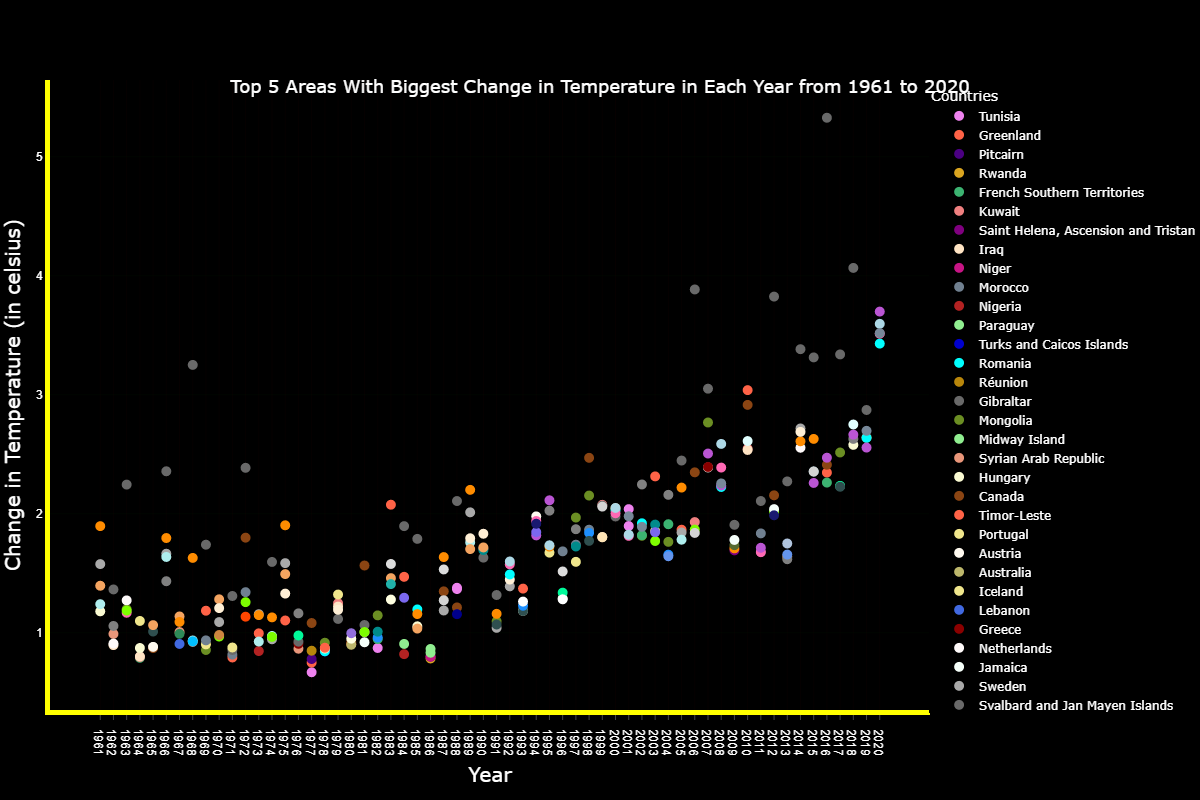

In [107]:
fig = go.Figure()
# np.random.seed(100)
tempcolor=np.random.choice(colorArr,size=82)

for i,areaname in enumerate(top5BigChngInTemp.sort_values(['AbsValue'],ascending=True).Area.unique()):
    fig.add_trace(
        go.Scatter(x=top5BigChngInTemp[top5BigChngInTemp['Area']==areaname].Year.values,
                    y=top5BigChngInTemp[top5BigChngInTemp['Area']==areaname].AbsValue.values,
                    mode='markers',
                    name=areaname,
                    marker=dict(color=tempcolor[i],
                                size=10,
                                ), 
                    hovertemplate=top5BigChngInTemp[top5BigChngInTemp['Area']==areaname].Template
                   )    
    )
fig.update_layout(legend=dict(
            title="Countries",
            indentation=10,
            bgcolor='black',
            x=0.999,
            y=0.995,
            xref='paper',
            yref='paper',
            font=dict(color='white'),
            ),
           showlegend=True
            )
    
fig.update_layout(title='Top 5 Areas With Biggest Change in Temperature in Each Year from 1961 to 2020',
                    titlefont=dict(
                                    size=18,
                                    color='white'
                                    ),
                   title_x=0.5, title_y=0.9,
                    xaxis_title='Year',
                    yaxis_title='Change in Temperature (in celsius)',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=800,
                    width=1200
                    )
fig.update_layout(
                    xaxis=dict(
                            showline=True,
                            showgrid=True,
                            showticklabels=True,
                            linecolor='yellow',
                            linewidth=5,
                            gridcolor="rgba(255,0,0,0.25)",
                            gridwidth=0.1,
                            
                            ticks='outside',
                            tickvals=np.array(range(1961,2021)),
                            tickfont=dict(
                                        family='Arial',
                                        size=12,
                                        color='white',
                                        ),
                            titlefont=dict(
                                        size=20,
                                        color='white'
                                        )),
                    yaxis=dict(
                        tickfont=dict(
                                    family='Arial',
                                    size=12,
                                    color='white',
                                    ),
                        titlefont=dict(
                                    size=20,
                                    color='white'
                                    ),
                        linecolor='yellow',
                        linewidth=5,
                        showgrid=True,
                        gridcolor='rgba(0,255,0,0.25)',
                        gridwidth=0.1,
                        zeroline=False,
                        # zerolinecolor='red',
                        showline=True,
                        showticklabels=True,
                        ),
                        autosize=True,
                        margin=dict(
                                    autoexpand=False, 
                                    l=50,
                                    r=270,
                                    t=80,
                                    b=90
                                    ),
                        ) 
fig.show('png')

From 1961 to 2020 lowest change in temperature in each country has measured and outof them Top 5 Area with lowest change in temperature has selected in each year.
1. scattered chart is plotted against the year in x axis and highest change in temperature in y axis and color of the each small small bubble represent each different Area/country.
2. it is observed that lowest change in temperature observed in each year has increased through out the entire 60 years.
3. from 1961 to 2000 the lowest change in temperature had always been between 0 and 0.1. but after 2000 the lowest temperature has observed, are between 0 to 0.5.


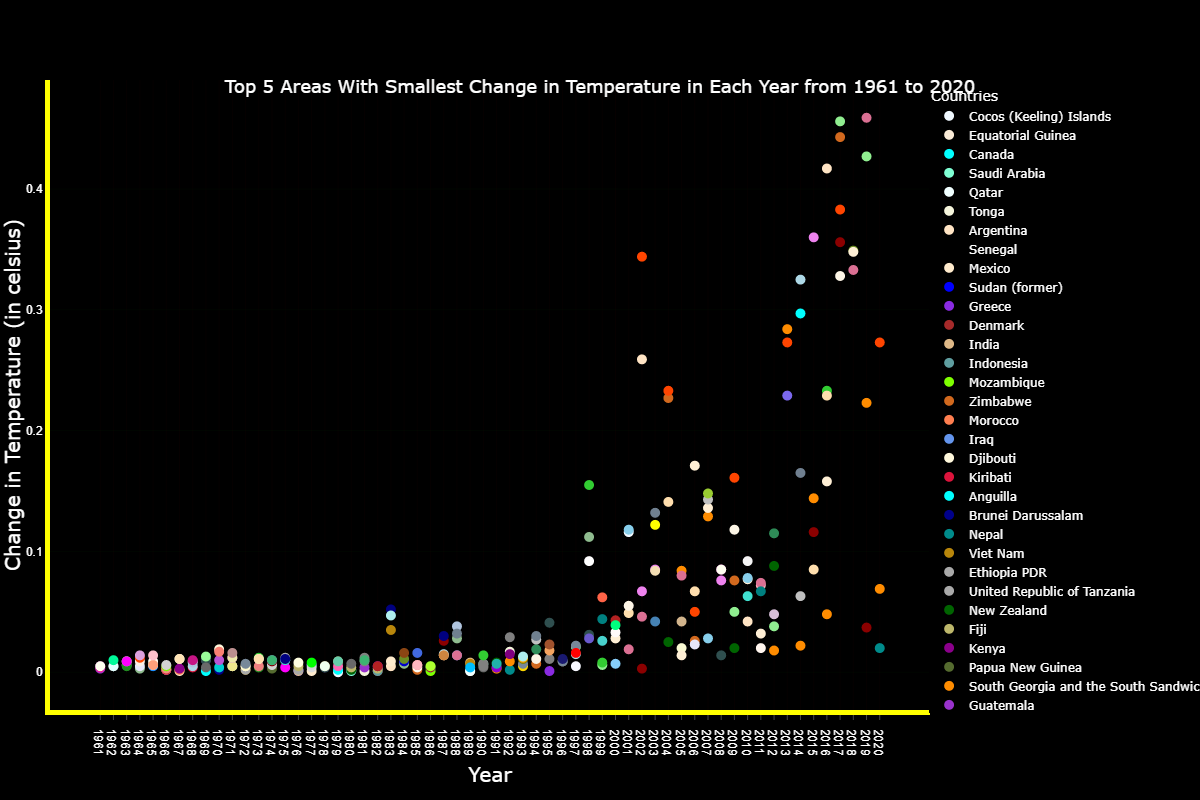

In [108]:
fig = go.Figure()
# np.random.seed(100)
tempcolor=colorArr

for i,areaname in enumerate(top5SmallChngInTemp.sort_values(['AbsValue'],ascending=True).Area.unique()[:147]):
    fig.add_trace(
        go.Scatter(x=top5SmallChngInTemp[top5SmallChngInTemp['Area']==areaname].Year.values,
                    y=top5SmallChngInTemp[top5SmallChngInTemp['Area']==areaname].AbsValue.values,
                    mode='markers',
                    name=areaname,
                    marker=dict(color=tempcolor[i],
                                size=10,
                                ), 
                    hovertemplate=top5SmallChngInTemp[top5SmallChngInTemp['Area']==areaname].Template
                   )    
    )
fig.update_layout(legend=dict(
            title="Countries",
            # # indentation\n\n=10,
            bgcolor='black',
            x=0.999,
            y=0.995,
            xref='paper',
            yref='paper',
            font=dict(color='white'),
            ),
           showlegend=True
            )
    
fig.update_layout(title='Top 5 Areas With Smallest Change in Temperature in Each Year from 1961 to 2020',
                    titlefont=dict(
                                    size=18,
                                    color='white'
                                    ),
                   title_x=0.5, title_y=0.9,
                    xaxis_title='Year',
                    yaxis_title='Change in Temperature (in celsius)',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=800,
                    width=1200
                    )
fig.update_layout(
                    xaxis=dict(
                            showline=True,
                            showgrid=True,
                            showticklabels=True,
                            linecolor='yellow',
                            linewidth=5,
                            gridcolor="rgba(255,0,0,0.25)",
                            gridwidth=0.1,
                            
                            ticks='outside',
                            tickvals=np.array(range(1961,2021)),
                            tickfont=dict(
                                        family='Arial',
                                        size=12,
                                        color='white',
                                        ),
                            titlefont=dict(
                                        size=20,
                                        color='white'
                                        )),
                    yaxis=dict(
                        tickfont=dict(
                                    family='Arial',
                                    size=12,
                                    color='white',
                                    ),
                        titlefont=dict(
                                    size=20,
                                    color='white'
                                    ),
                        linecolor='yellow',
                        linewidth=5,
                        showgrid=True,
                        gridcolor='rgba(0,255,0,0.25)',
                        gridwidth=0.1,
                        zeroline=False,
                        # zerolinecolor='red',
                        showline=True,
                        showticklabels=True,
                        ),
                        autosize=True,
                        margin=dict(
                                    autoexpand=False, 
                                    l=50,
                                    r=270,
                                    t=80,
                                    b=90
                                    ),
                        ) 
fig.show('png')

plotting Barplot to visulize clearly the Areas/countries with highest change in temperature through out the year from 1961 to 2020.
1. from this plot it is visually more clear that countries like 'Svalbard and jan mayen island', 'Finland', 'Greenland', 'Poland', 'Sweden', 'canada', 'Mongolia', 'russia','denmark',and 'norway' has seen significant change in temperature frequently through out the entire 60 years.
2. in first 10 years(1961-2020):
> 2.1: finland, poland has seen highest change in temperature 4 times.<br>2.2: norway,sweden and hungary 3 times.<br>2.3: svalbar and jan mayen island has seen 5 times
3. from 2011 to 2020 years:
> 3.1: svalbar and Jan mayen island has seen highest change in temperature 8 times.<br>3.2: Russian-federation has seen 4 times.<br> 3.3: belarus,lithuania,czechia,finland,estonia, and morroco has seen 2 times and lativa,iran,Denmark, Green land,sweden, turkey, armenia, hungary,western sahara, uzbekistan, mangolia, baharin,netherland, turkmenistan, kazakhsta, republic of maldova has seen only once in this 10 years.


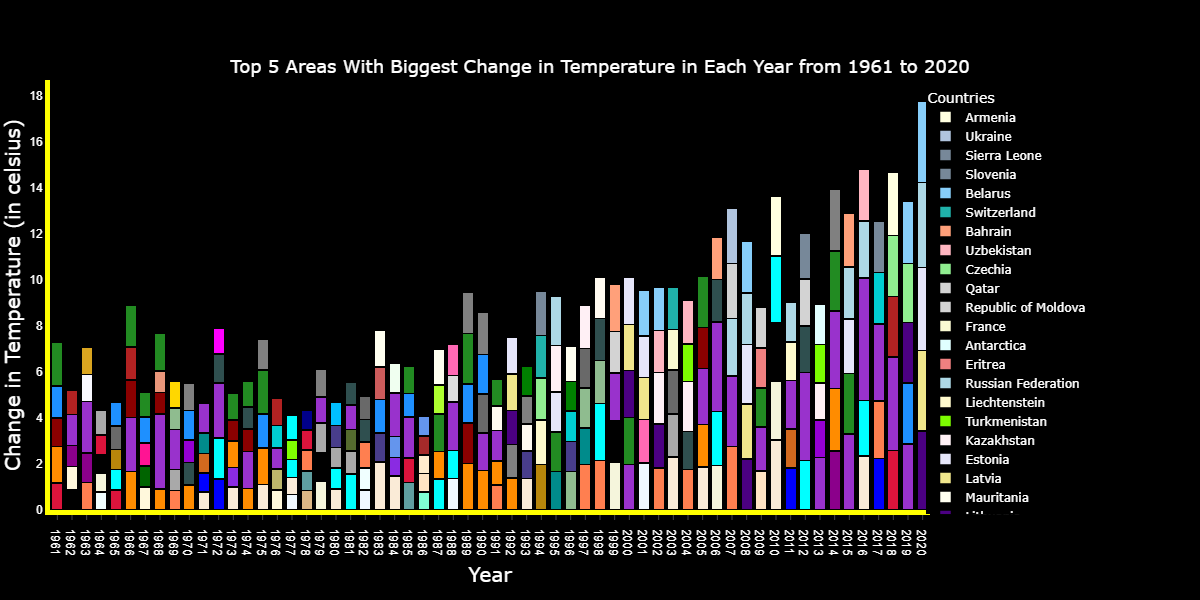

In [109]:
fig = go.Figure()
tempcolor=colorArr[:82]
for i,areaname in enumerate(top5BigChngInTemp.sort_values(['AbsValue'],ascending=True).Area.unique()):
    fig.add_trace(
        go.Bar(x=top5BigChngInTemp[top5BigChngInTemp['Area']==areaname].Year.values,
                y=top5BigChngInTemp[top5BigChngInTemp['Area']==areaname].AbsValue.values,
                name=areaname,
                marker_color=tempcolor[i],
                marker_line_color='black',
                marker_line_width=1.5,
                opacity=1,
                hovertemplate=top5BigChngInTemp[top5BigChngInTemp['Area']==areaname].Template
                 )    
    )
fig.update_layout(barmode='stack')
fig.update_layout(legend=dict(
            title="Countries",
            # # indentation\n\n=10,
            bgcolor='black',
            x=0.995,
            y=0.99,
            xref='paper',
            yref='paper',
            font=dict(color='white'),
            ),
           showlegend=True,)
    
fig.update_layout(title='Top 5 Areas With Biggest Change in Temperature in Each Year from 1961 to 2020',
                    titlefont=dict(
                                    size=18,
                                    color='white'
                                    ),
                   title_x=0.5, title_y=0.9,
                    xaxis_title='Year',
                    yaxis_title='Change in Temperature (in celsius)',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=600,
                    width=1200
                    )
fig.update_layout(
                    xaxis=dict(
                            showline=True,
                            showgrid=False,
                            showticklabels=True,
                            linecolor='yellow',
                            linewidth=5,
                            # gridcolor='gray',
                            # gridwidth=0.1,
                            ticks='outside',
                            tickvals=np.array(range(1961,2021)),
                            tickfont=dict(
                                        family='Arial',
                                        size=12,
                                        color='white',
                                        ),
                            titlefont=dict(
                                        size=20,
                                        color='white'
                                        )
                              ),
                    yaxis=dict(
                        tickfont=dict(
                                    family='Arial',
                                    size=12,
                                    color='white',
                                    ),
                        titlefont=dict(
                                    size=20,
                                    color='white'
                                    ),
                        linecolor='yellow',
                        linewidth=5,
                        showgrid=False,
                        # gridcolor='gray',
                        # gridwidth=0.1,
                        zeroline=False,
                        # zerolinecolor='red',
                        showline=True,
                        showticklabels=True,
                        ),
                        autosize=True,
                        margin=dict(
                                    autoexpand=False, 
                                    l=50,
                                    r=270,
                                    t=80,
                                    b=90
                                    ),
                        ) 

fig.show('png')

Stack barplot to visualize the lowest change in temperature more clearly.length of the each bar is representing magnitude of change in temperature.xaxis representing the year from 1961-2020. y axis representing sumation of top 5 lowest change in temperature seen in each year. color representing each different Area/country. 
1. after 2000 there is drastic increase in magnitude of lowest temperature change.
2. after 1013 the magintude of lowest temperature change again has increased drastically.
3. countries like Eswatini, Wake Island, Solomon Island, Zimbawea, chile, antarctica, saint pieree and miquelon, fiji, tuvalu, argentina, parague, new zealand etc. has seen to be having lowes change in temperature frequently through out the year from 1961 to 2020.
4. South Georgia and south Sandwich Island has been obserbed to have lowest change in temperature most of the times.

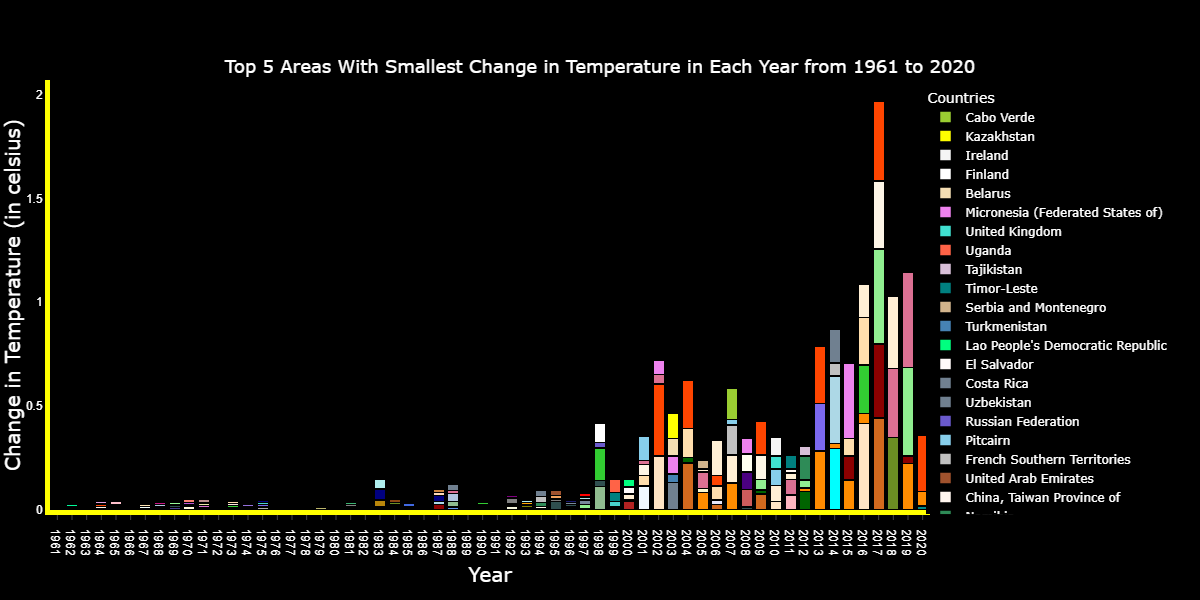

In [110]:
fig = go.Figure()
tempcolor=colorArr
for i,areaname in enumerate(top5SmallChngInTemp.sort_values(['AbsValue'],ascending=True).Area.unique()[:147]):
    fig.add_trace(
        go.Bar(x=top5SmallChngInTemp[top5SmallChngInTemp['Area']==areaname].Year.values,
                y=top5SmallChngInTemp[top5SmallChngInTemp['Area']==areaname].AbsValue.values,
                name=areaname,
                marker_color=tempcolor[i],
                marker_line_color='black',
                marker_line_width=1.5,
                opacity=1,
                hovertemplate=top5SmallChngInTemp[top5SmallChngInTemp['Area']==areaname].Template
                 )    
    )
fig.update_layout(barmode='stack')
fig.update_layout(legend=dict(
            title="Countries",
            # # indentation\n\n=10,
            bgcolor='black',
            x=0.995,
            y=0.99,
            xref='paper',
            yref='paper',
            font=dict(color='white'),
            ),
           showlegend=True,)
    
fig.update_layout(title='Top 5 Areas With Smallest Change in Temperature in Each Year from 1961 to 2020',
                    titlefont=dict(
                                    size=18,
                                    color='white'
                                    ),
                   title_x=0.5, title_y=0.9,
                    xaxis_title='Year',
                    yaxis_title='Change in Temperature (in celsius)',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=600,
                    width=1200
                    )
fig.update_layout(
                    xaxis=dict(
                            showline=True,
                            showgrid=False,
                            showticklabels=True,
                            linecolor='yellow',
                            linewidth=5,
                            # gridcolor='gray',
                            # gridwidth=0.1,
                            ticks='outside',
                            tickvals=np.array(range(1961,2021)),
                            tickfont=dict(
                                        family='Arial',
                                        size=12,
                                        color='white',
                                        ),
                            titlefont=dict(
                                        size=20,
                                        color='white'
                                        )
                              ),
                    yaxis=dict(
                        tickfont=dict(
                                    family='Arial',
                                    size=12,
                                    color='white',
                                    ),
                        titlefont=dict(
                                    size=20,
                                    color='white'
                                    ),
                        linecolor='yellow',
                        linewidth=5,
                        showgrid=False,
                        # gridcolor='gray',
                        # gridwidth=0.1,
                        zeroline=False,
                        # zerolinecolor='red',
                        showline=True,
                        showticklabels=True,
                        ),
                        autosize=True,
                        margin=dict(
                                    autoexpand=False, 
                                    l=50,
                                    r=270,
                                    t=80,
                                    b=90
                                    ),
                        ) 

fig.show('png')

Top 10 countries which has seen  highest change in temperature most of the times through out the entire 60 years from 1961 2020
1. countries/Area like Svalbard and Jan Mayen Islands, Finland, Sweden, Greenland, Canada, Mongolia, Poland, Norway, Russian Ferderation, and Estonia been top 10 countries/Area which has seen significant change in temperature.
2. in entire 60 years, 'Svalbard and Jan Mayen Islands' has seen significant change in temperature 31 times.
3. finland has seen 17 times.
4. Sweden has seen 14 times.
5. Greenland and Canada has seen 11 times.
6. Poland has seen 10 times.
7. Norway, Denmark, and Estonia has seen 7 times.
8. Russia has seen 7 times since 1992.
9. Saint Pierre and Miquelon, Hungary, Lithuania, and  Latvia 6 times.
10. Kuwait, Kazakhastan, Iceland, Iraq, and Belarus has seen 5 times.

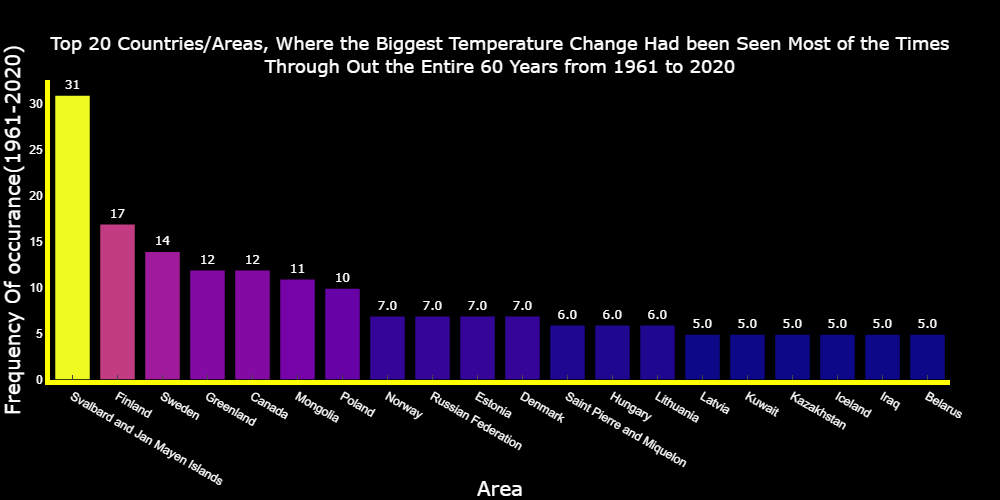

In [111]:
fig = go.Figure()
topAreaHighestOccuranceChngTemp=pd.DataFrame(top5BigChngInTemp.value_counts('Area'),columns=['count']).head(20).reset_index()
fig.add_trace(
    go.Bar(x=topAreaHighestOccuranceChngTemp['Area'].values,
            y=topAreaHighestOccuranceChngTemp['count'].values,
            marker_color=topAreaHighestOccuranceChngTemp['count'].values,
            marker_line_color='black',
            marker_line_width=1.5,
            opacity=1,
            
            )    
)
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside',textfont_color='white')    
fig.update_layout(title='Top 20 Countries/Areas, Where the Biggest Temperature Change Had been Seen Most of the Times<br>Through Out the Entire 60 Years from 1961 to 2020',
                    titlefont=dict(
                                    size=18,
                                    color='white'
                                    ),
                   title_x=0.5, title_y=0.9,
                    xaxis_title='Area',
                    yaxis_title='Frequency Of occurance(1961-2020)',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=500,
                    width=1000
                    )
fig.update_layout( xaxis=dict(
                                showline=True,
                                showgrid=False,
                                showticklabels=True,
                                linecolor='yellow',
                                linewidth=5,
                                # gridcolor='gray',
                                # gridwidth=0.1,

                                ticks='inside',

                                tickfont=dict(
                                        family='Arial',
                                        size=12,
                                        color='white',
                                        ),
                                titlefont=dict(
                                        size=20,
                                        color='white'
                                        )
                              ),
                    yaxis=dict(
                        tickfont=dict(
                                    family='Arial',
                                    size=12,
                                    color='white',
                                    ),
                        titlefont=dict(
                                    size=20,
                                    color='white'
                                    ),
                        linecolor='yellow',
                        linewidth=5,
                        showgrid=False,
                        # gridcolor='gray',
                        # gridwidth=0.1,
                        zeroline=False,
                        # zerolinecolor='red',
                        showline=True,
                        showticklabels=True,
                        ),
                        autosize=True,
                        margin=dict(
                                    autoexpand=False, 
                                    l=50,
                                    r=50,
                                    t=80,
                                    b=120
                                    ),
                        ) 
fig.show('png')

below bar plot is showing the top 20 countries where lowest magnitude of temperature has seen frequently. height of the bar is showing the frequency of occurace of this natural phenomenon.
1. south Georgia has seen 11 times.
2. eswatini,and  wake Island has seen 8 times.
3. Solomon Island, and chile has seen 7 times.
4. zimbabwe and antarctica has seen 6 times.

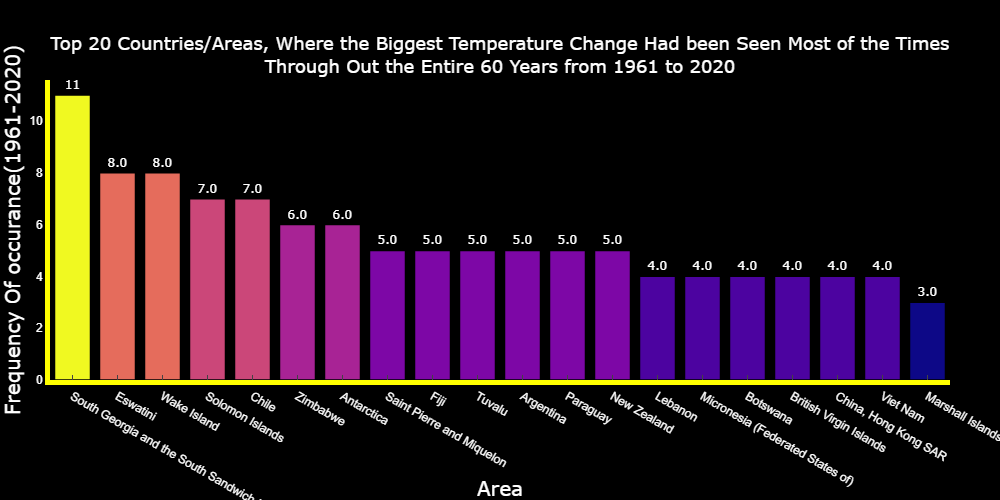

In [112]:
fig = go.Figure()
topAreaHighestOccuranceChngTemp=pd.DataFrame(top5SmallChngInTemp.value_counts('Area'),columns=['count']).head(20).reset_index()
fig.add_trace(
    go.Bar(x=topAreaHighestOccuranceChngTemp['Area'].values,
            y=topAreaHighestOccuranceChngTemp['count'].values,
            marker_color=topAreaHighestOccuranceChngTemp['count'].values,
            marker_line_color='black',
            marker_line_width=1.5,
            opacity=1,
            
            )    
)
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside',textfont_color='white')    
fig.update_layout(title='Top 20 Countries/Areas, Where the Biggest Temperature Change Had been Seen Most of the Times<br>Through Out the Entire 60 Years from 1961 to 2020',
                    titlefont=dict(
                                    size=18,
                                    color='white'
                                    ),
                   title_x=0.5, title_y=0.9,
                    xaxis_title='Area',
                    yaxis_title='Frequency Of occurance(1961-2020)',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=500,
                    width=1000
                    )
fig.update_layout( xaxis=dict(
                                showline=True,
                                showgrid=False,
                                showticklabels=True,
                                linecolor='yellow',
                                linewidth=5,
                                # gridcolor='gray',
                                # gridwidth=0.1,

                                ticks='inside',

                                tickfont=dict(
                                        family='Arial',
                                        size=12,
                                        color='white',
                                        ),
                                titlefont=dict(
                                        size=20,
                                        color='white'
                                        )
                              ),
                    yaxis=dict(
                        tickfont=dict(
                                    family='Arial',
                                    size=12,
                                    color='white',
                                    ),
                        titlefont=dict(
                                    size=20,
                                    color='white'
                                    ),
                        linecolor='yellow',
                        linewidth=5,
                        showgrid=False,
                        # gridcolor='gray',
                        # gridwidth=0.1,
                        zeroline=False,
                        # zerolinecolor='red',
                        showline=True,
                        showticklabels=True,
                        ),
                        autosize=True,
                        margin=dict(
                                    autoexpand=False, 
                                    l=50,
                                    r=50,
                                    t=80,
                                    b=120
                                    ),
                        ) 
fig.show('png')

If we consider only the mangintude of biggest change in temperature, then Svalbard and Jan Mayen Islands, Russian Federation, Estonia, Belarus, Latvia, Lithuania, Green Land, Canada, mangolia, Armenia, and sweden have seen highest change in temperature in entire 60 years from 1961 to 2020.

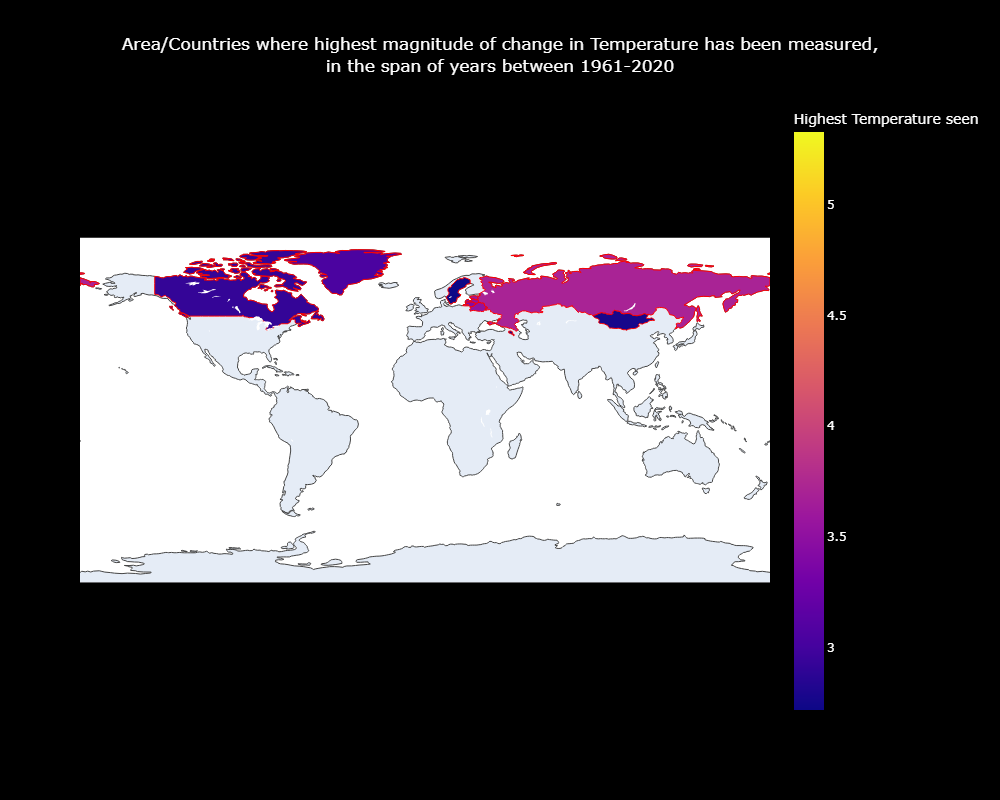

In [113]:
HighChngInTemp=top5BigChngInTemp.sort_values('AbsValue',ascending=False).head(20)
# print(HighChngInTemp)
title = 'Area/Countries where highest magnitude of change in Temperature has been measured,<br>in the span of years between 1961-2020'
layout = go.Layout(title = {'text' : title, 
                            'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'white'},
                   width=1000, height=800, plot_bgcolor="black", paper_bgcolor="black",
                    
                   geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular')
                  )

# Create the figure
fig = go.Figure(layout = layout)

trace = go.Choropleth(
    locations = HighChngInTemp['Area Code (ISO3)'],
    z = HighChngInTemp['AbsValue'],
    text=HighChngInTemp['Template'],
    # texttemplate='%{text:}', textposition='outside',textfont_color='white',
    # colorscale = 'RdYlGn',
    autocolorscale=True,
    reversescale=False,
    marker_line_color='red',
    marker_line_width=1,
    colorbar_tickprefix = '',
    colorbar_title = 'Highest Temperature seen',
)
fig.add_trace(trace)

fig.show('png')



In the Year span of 60 years from 1961 to 2020 countries like Cocos (keeling) Islands, Epuatorial Guinea, Canada, Saudi Arabia, Qatar, Tonga, Argentina, senegal, Mexico, and sudan(former) has seen lowest change in temperature.  

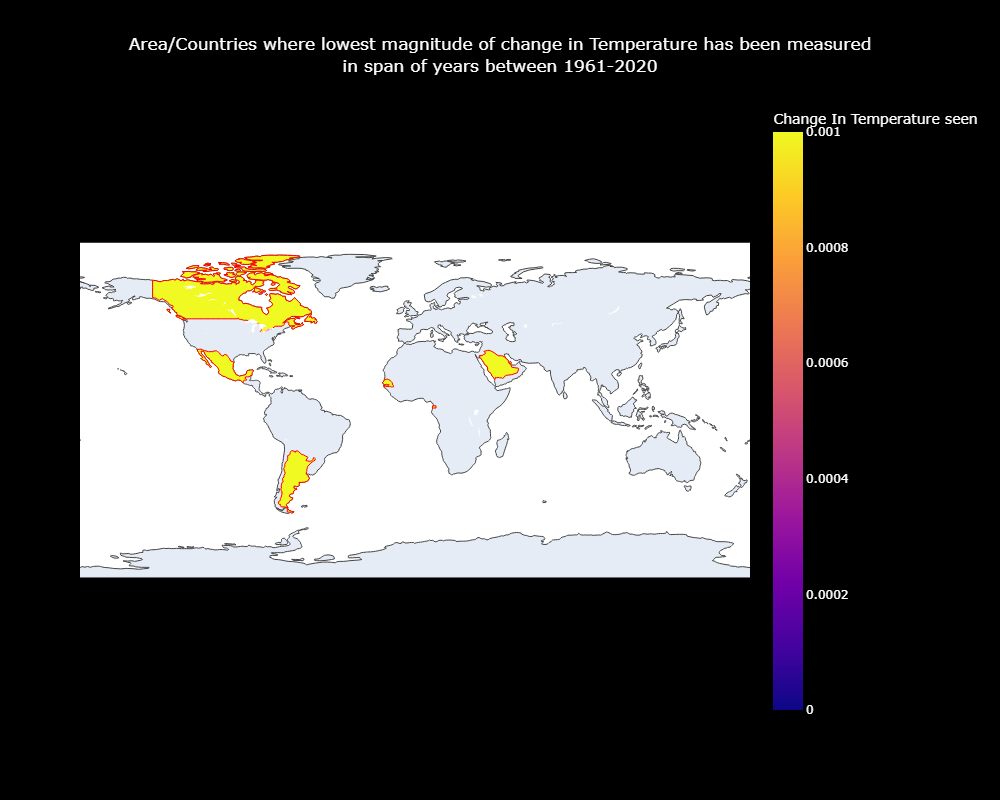

In [114]:
LowestChnageInTemp=top5SmallChngInTemp.sort_values('AbsValue',ascending=True).head(10)
# print(HighChngInTemp)
title = 'Area/Countries where lowest magnitude of change in Temperature has been measured<br>in span of years between 1961-2020'
layout = go.Layout(title = {'text' : title, 
                            'x':0.5, 'xanchor': 'center'}, 
                   font = {"color" : 'white'},
                   width=1000, height=800, plot_bgcolor="black", paper_bgcolor="black",
                    
                   geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular')
                  )

# Create the figure
fig = go.Figure(layout = layout)

trace = go.Choropleth(
    locations = LowestChnageInTemp['Area Code (ISO3)'],
    z = LowestChnageInTemp['AbsValue'],
    text=LowestChnageInTemp['Template'],
    
    # colorscale = 'RdYlGn',
    autocolorscale=True,
    reversescale=False,
    marker_line_color='red',
    marker_line_width=1,
    colorbar_tickprefix = '',
    colorbar_title = 'Change In Temperature seen',
)
fig.add_trace(trace)

fig.show('png')



## V. Are there any correlations between the hottest changes and other phenomena (like land coverage, land fires, CO2 emissions etc.)

### V.1 Let Find the Correlation Between Land Coverage and Hottest Changes In Temperature.

1. this dataset contains 14 columns,where out of them, columns like 'Area Code (ISO3)', 'Area', 'Year','items' 'Unit', 'Value', 'Flag(Flag Description)' are important for the below analysis, so only these column going to be used.
2. here 'Value' column representing 1000 hactor of land area which have been covered. 
3. here items column representing different type of land coverage in a specific Area/country and in a pecific year. 
4. goal is to find which type of land coverage has highest correlation with change in temperature.



In [115]:
landCoverage=pd.read_csv('land_cover_data_11-30-2021.csv')[['Area','Area Code (ISO3)','Item','Year','Unit','Value','Flag']]
landCoverage=landCoverage.replace('United States of America','United States')
landCoverage=landCoverage.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom')
landCoverage.head(5)


,Area,Area Code (ISO3),Item,Year,Unit,Value,Flag
0,Afghanistan,AFG,Artificial surfaces (including urban and assoc...,2001,1000 ha,88.1603,FC
1,Afghanistan,AFG,Artificial surfaces (including urban and assoc...,2002,1000 ha,88.1818,FC
2,Afghanistan,AFG,Artificial surfaces (including urban and assoc...,2003,1000 ha,88.2247,FC
3,Afghanistan,AFG,Artificial surfaces (including urban and assoc...,2004,1000 ha,88.2462,FC
4,Afghanistan,AFG,Artificial surfaces (including urban and assoc...,2005,1000 ha,88.3106,FC


1. only Value column has 43400 no of not-null values and 17360 no of null values.except that every column has 60760 no of notnull values.
2. so first of all rows having null value need to be dropped.
3. after droping null value rows the distribution of flag column values are 
>3.1: "Aggregate, may include official, semi-official, estimated or calculated data":180 <br>3.2: "calculated data": 43220
4. distribution each catergory of item(type of land coverage) are also uniform for each specific countries and year.
5. so next step is to pivot the table to make individual column for each type of land coverage.



In [116]:
print(landCoverage.info())
landCoverage.dropna(inplace=True)
print(landCoverage.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60760 entries, 0 to 60759
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              60760 non-null  object 
 1   Area Code (ISO3)  60760 non-null  object 
 2   Item              60760 non-null  object 
 3   Year              60760 non-null  int64  
 4   Unit              60760 non-null  object 
 5   Value             43400 non-null  float64
 6   Flag              60760 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43400 entries, 0 to 60741
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              43400 non-null  object 
 1   Area Code (ISO3)  43400 non-null  object 
 2   Item              43400 non-null  object 
 3   Year              43400 non-null  int64  
 4   Unit   

In [117]:
landCoverage.Flag.value_counts()

FC    43220
A       180
Name: Flag, dtype: int64

In [118]:
landCoverage.value_counts(['Area','Year'])

Area                         Year
Afghanistan                  2001    10
North Macedonia              2007    10
Norfolk Island               2011    10
                             2012    10
                             2013    10
                                     ..
French Southern Territories  2012    10
                             2013    10
                             2014    10
                             2015    10
Zimbabwe                     2018    10
Length: 4340, dtype: int64

In [119]:
landCoveragePivot=pd.pivot_table(landCoverage, index=['Area','Area Code (ISO3)','Year'],columns=['Item'],values=['Value']).reset_index()
landCoveragePivot=pd.concat([landCoveragePivot[['Area','Area Code (ISO3)','Year']],landCoveragePivot.Value],axis=1)
landCoveragePivot.columns=['Area','Area Code (ISO3)','Year','Artificial surfaces (including urban and associated areas)','Grassland','Herbaceous crops','Inland water bodies','Mangroves','Permanent snow and glaciers','Shrub-covered areas','Shrubs and/or herbaceous vegetation, aquatic or regularly flooded','Terrestrial barren land','Tree-covered areas']
landCoveragePivot.head()

,Area,Area Code (ISO3),Year,Artificial surfaces (including urban and associated areas),Grassland,Herbaceous crops,Inland water bodies,Mangroves,Permanent snow and glaciers,Shrub-covered areas,"Shrubs and/or herbaceous vegetation, aquatic or regularly flooded",Terrestrial barren land,Tree-covered areas
0,Afghanistan,AFG,2001,88.1603,23533.7602,1938.1961,30.0737,0.0,344.5701,4526.5074,1.2450,33103.7590,554.8927
1,Afghanistan,AFG,2002,88.1818,23597.6426,2105.9089,23.5695,0.0,365.4779,4586.6119,1.8246,32849.1953,562.0837
2,Afghanistan,AFG,2003,88.2247,23822.6478,2128.1690,13.7811,0.0,413.3467,4637.5504,1.7602,32556.7658,560.0445
3,Afghanistan,AFG,2004,88.2462,24072.0168,2012.8114,3.4131,0.0,447.3916,4714.9563,5.0230,32414.3398,559.8942
4,Afghanistan,AFG,2005,88.3106,24356.4181,1972.0907,9.1659,0.0,444.6869,4839.3295,2.2110,32043.9892,562.5345


if we analyze the distribution of 'Year',and Value of each item type(each different type of land coverage) column, it is found that
1. this dataset contains information about land coverage only from 2001 to 2018.



In [120]:
landCoveragePivot.describe()

,Year,Artificial surfaces (including urban and associated areas),Grassland,Herbaceous crops,Inland water bodies,Mangroves,Permanent snow and glaciers,Shrub-covered areas,"Shrubs and/or herbaceous vegetation, aquatic or regularly flooded",Terrestrial barren land,Tree-covered areas
count,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,2009.517281,352.220900,13623.712160,5647.677287,2052.819531,84.885927,5052.016706,5647.678826,421.483859,9280.599254,21710.872655
std,5.187823,1461.427999,43500.830423,21516.853265,7575.655359,359.713556,64169.998298,36598.318694,3327.751649,32545.548288,84880.226109
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,0.450800,6.514875,0.042900,35.289900,0.000000,0.000000,0.000000,0.214700,0.042900,3.293975
50%,2010.000000,30.825000,462.928600,234.392250,158.922550,0.000000,0.000000,0.386400,7.244750,1.363050,930.760000
75%,2014.000000,154.055200,4159.489375,2329.818325,1006.775975,7.851150,0.000000,125.459375,72.098525,185.148475,10429.789475
max,2018.000000,13892.559100,288630.112200,196808.100200,78127.728800,3851.685000,982529.432800,449512.799500,43108.720700,228118.523400,917064.779800


1. by analyzing the distribution of year column and each type of land coverage value it is found that.
2. the year distribution is approximately uniform excepting few contries, where some of the year data is not available for that country.
3. by analyzing the each type of land coverage data it is obserbed that distribution of all of them is right skewed.
4. only median of tree covered areas is 930.76 thousand hactares of land. 
5. except tree covered areas, most of the landcoverage area are mangroves, permanent snows and glaciers, shrub covered areas, Terrestrial barren land, has median land coverage area are around 1000 hactares of land.
6. hrubs and/or herbaceous vegetation, aquatic or regularly flooded has median of around 7000 hactares of land.
7. Artificial surfaces (including urban and associated areas) has around 30,000 hactares of land.
8. grassland  has median 462,000 hactares.
9. Herbaceous crops has median 234,000 hactares.
10. Island Water bodies has median value 158,000 hactares of land.

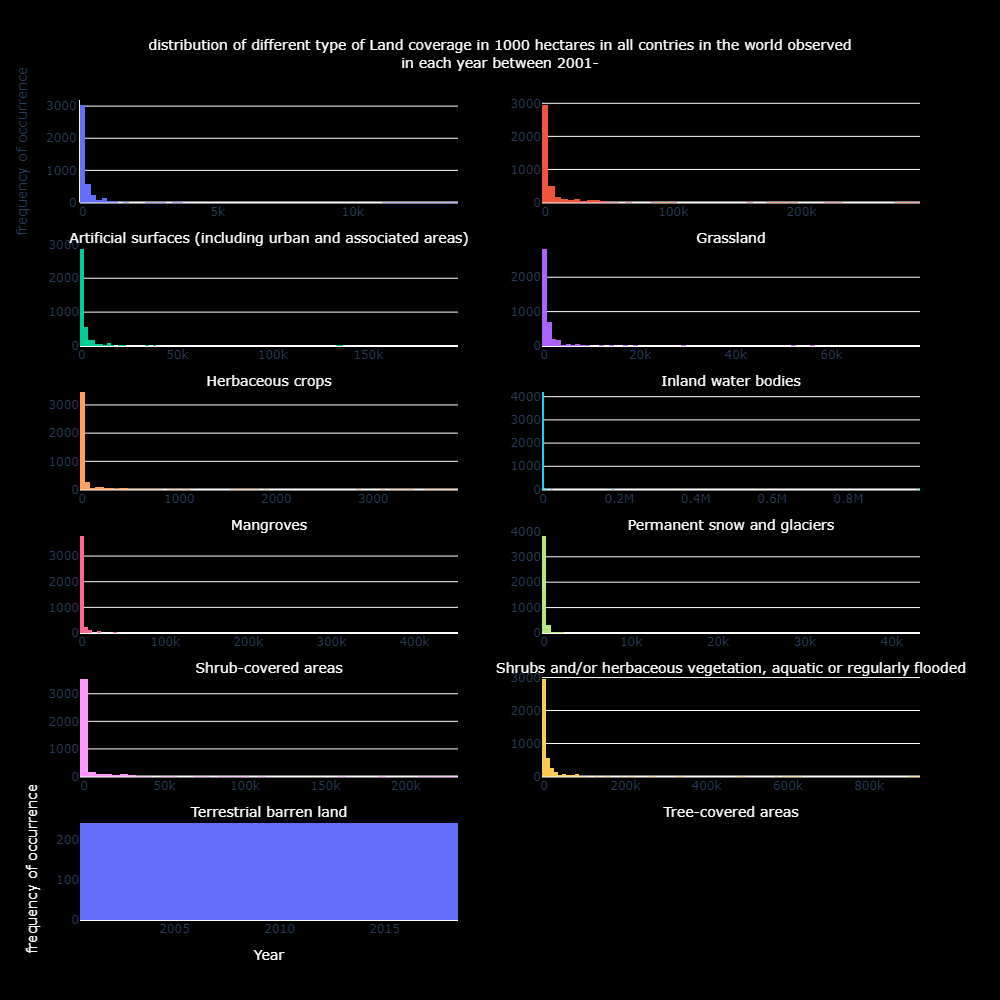

In [121]:
fig=make_subplots(rows=6, cols=2,
                 # subplot_titles=[f"{colname}<br>Land Coverage in 1000 hectares" for colname in landCoveragePivot.columns[3:]]
                 )
for i,colname in enumerate(landCoveragePivot.columns[3:]):
    fig.append_trace(go.Histogram(x=landCoveragePivot[colname],
                                  hovertemplate='%{x}:'),
                                 i//2+1,i%2+1
                                )
    # fig.update_yaxes(title_text="frequency of occurrence",title=dict(font=dict(size=14,color='white')), row=i//2+1, col=i%2+1,)
    fig.update_xaxes(title_text=f'{colname}',title=dict(font=dict(size=14,color='white')),row=i//2+1,col=i%2+1)
fig.append_trace(go.Histogram(x=landCoveragePivot['Year'],
                              hovertemplate='%{x}:'),
                             6,1
                            )
fig.update_yaxes(title_text="frequency of occurrence",title=dict(font=dict(size=14,color='white')), row=6, col=1,)
fig.update_xaxes(title_text=f'Year',title=dict(font=dict(size=14,color='white')),row=6,col=1)
fig.update_layout(
    height=1000,
    width=1000,
    title_text='distribution of different type of Land coverage in 1000 hectares in all contries in the world observed<br>in each year between 2001- ',
    yaxis=dict(title='frequency of occurrence',showline=True),   
    title=dict(x=0.5,xanchor='center',font=dict(color='white',size=14)),
    paper_bgcolor='black',
    plot_bgcolor='black',
    showlegend=False
)
fig.show('png')

let see the distribution of each country data 


there are total 18 years exist between 2001 to 2018 and so each area should have 18 years of data but due to many reason.
1. countries like serbia and montenegro has divided in 2006 into two contries which are Serbia and Montengro now 
2. sudan(former) has divided into two seperate countries  which are sudan and south sudan in 2011.
3. 2007  data of tree coverage area are not available so this so it has 17 year of data from 2001 to 2018.
4. so these countries would be excluded from the analysis 



In [122]:
YearCountForEachArea=landCoveragePivot[['Area','Year']].groupby('Area').count().sort_values('Year')
print(YearCountForEachArea[YearCountForEachArea['Year']!=18])
landCoveragePivot=landCoveragePivot[(~landCoveragePivot.Area.isin(['Serbia and Montenegro','South Sudan','Sudan', 'Sudan (former)','Montenegro' ,'Serbia' ,'Singapore']))]
landCoveragePivot

                       Year
Area                       
Serbia and Montenegro     5
Sudan                     8
South Sudan               8
Sudan (former)           10
Montenegro               13
Serbia                   13
Singapore                17


,Area,Area Code (ISO3),Year,Artificial surfaces (including urban and associated areas),Grassland,Herbaceous crops,Inland water bodies,Mangroves,Permanent snow and glaciers,Shrub-covered areas,"Shrubs and/or herbaceous vegetation, aquatic or regularly flooded",Terrestrial barren land,Tree-covered areas
0,Afghanistan,AFG,2001,88.1603,23533.7602,1938.1961,30.0737,0.0,344.5701,4526.5074,1.2450,33103.7590,554.8927
1,Afghanistan,AFG,2002,88.1818,23597.6426,2105.9089,23.5695,0.0,365.4779,4586.6119,1.8246,32849.1953,562.0837
2,Afghanistan,AFG,2003,88.2247,23822.6478,2128.1690,13.7811,0.0,413.3467,4637.5504,1.7602,32556.7658,560.0445
3,Afghanistan,AFG,2004,88.2462,24072.0168,2012.8114,3.4131,0.0,447.3916,4714.9563,5.0230,32414.3398,559.8942
4,Afghanistan,AFG,2005,88.3106,24356.4181,1972.0907,9.1659,0.0,444.6869,4839.3295,2.2110,32043.9892,562.5345
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Zimbabwe,ZWE,2014,55.9615,30081.7513,1979.8785,369.8140,0.0,0.0000,2240.7790,45.2930,19.2334,4480.6392
4336,Zimbabwe,ZWE,2015,56.2191,30173.5308,1969.6994,358.6517,0.0,0.0000,2341.8317,46.1945,21.2727,4305.9500
4337,Zimbabwe,ZWE,2016,56.4552,30225.4824,1992.5777,351.8900,0.0,0.0000,2422.8696,45.2500,22.9685,4155.8563
4338,Zimbabwe,ZWE,2017,56.6484,29840.5651,2052.3129,353.4570,0.0,0.0000,2273.6904,47.5254,21.1653,4627.9852


lets map between two table which are change in temperature and land coverage data from year 2001 to 1018. 
join will be happend by considering (Area, and year) columns as index for joining two table.


In [123]:
YearCountForEachAreaTemp=filteredData[(filteredData['Year']<=2018) & (filteredData['Year']>=2001)][['Area','Year']].groupby(['Area']).count().sort_values('Year')
print('countries with less than 18 year of data \n\n',YearCountForEachAreaTemp[YearCountForEachAreaTemp['Year']!=18].index)
mapTempLandCoverage=filteredData[(filteredData['Year']<=2018) & (filteredData['Year']>=2001)]
mapTempLandCoverage=mapTempLandCoverage[(~mapTempLandCoverage.Area.isin(YearCountForEachAreaTemp[YearCountForEachAreaTemp['Year']!=18].index))].reset_index(drop=True)
# mapTempLandCoverage.head()
mapTempLandCoverage=pd.merge(mapTempLandCoverage,landCoveragePivot,on=['Area','Year'])
mapTempLandCoverage.drop(columns=['Area Code (ISO3)_y'] ,axis=1,inplace=True)
mapTempLandCoverage.drop(columns=['ChangeDir'],inplace=True)
mapTempLandCoverage['SumOfLand']=mapTempLandCoverage.iloc[:,5:].sum(axis=1)
mapTempLandCoverage.head()

countries with less than 18 year of data 

 Index(['Serbia and Montenegro', 'Midway Island', 'Rwanda', 'Burundi',
       'South Sudan', 'Sudan', 'Sudan (former)', 'Pitcairn', 'Montenegro',
       'Aruba', 'Serbia', 'Palau', 'Timor-Leste', 'Cayman Islands',
       'Christmas Island', 'Solomon Islands', 'Cook Islands', 'Kiribati',
       'Norfolk Island', 'Djibouti', 'Saint Kitts and Nevis', 'Montserrat',
       'Samoa', 'Réunion', 'Antigua and Barbuda', 'American Samoa',
       'South Georgia and the South Sandwich Islands'],
      dtype='object', name='Area')


,Area,Year,Area Code (ISO3)_x,Value,AbsValue,Artificial surfaces (including urban and associated areas),Grassland,Herbaceous crops,Inland water bodies,Mangroves,Permanent snow and glaciers,Shrub-covered areas,"Shrubs and/or herbaceous vegetation, aquatic or regularly flooded",Terrestrial barren land,Tree-covered areas,SumOfLand
0,Afghanistan,2001.0,AFG,1.355,1.355,88.1603,23533.7602,1938.1961,30.0737,0.0,344.5701,4526.5074,1.2450,33103.7590,554.8927,64121.1645
1,Afghanistan,2002.0,AFG,1.361,1.361,88.1818,23597.6426,2105.9089,23.5695,0.0,365.4779,4586.6119,1.8246,32849.1953,562.0837,64180.4962
2,Afghanistan,2003.0,AFG,0.632,0.632,88.2247,23822.6478,2128.1690,13.7811,0.0,413.3467,4637.5504,1.7602,32556.7658,560.0445,64222.2902
3,Afghanistan,2004.0,AFG,1.370,1.370,88.2462,24072.0168,2012.8114,3.4131,0.0,447.3916,4714.9563,5.0230,32414.3398,559.8942,64318.0924
4,Afghanistan,2005.0,AFG,0.477,0.477,88.3106,24356.4181,1972.0907,9.1659,0.0,444.6869,4839.3295,2.2110,32043.9892,562.5345,64318.7364


minmax normalization of dataframe(mapTempLandCoverage) which exhibit map between change in temperature and land coverage per each specific area and per each specific year from 2001-2018  

In [124]:
mapTempLandCoverage.iloc[:,3:]=MinMaxScaler().fit_transform(mapTempLandCoverage.iloc[:,3:])
mapTempLandCoverage.head()

,Area,Year,Area Code (ISO3)_x,Value,AbsValue,Artificial surfaces (including urban and associated areas),Grassland,Herbaceous crops,Inland water bodies,Mangroves,Permanent snow and glaciers,Shrub-covered areas,"Shrubs and/or herbaceous vegetation, aquatic or regularly flooded",Terrestrial barren land,Tree-covered areas,SumOfLand
0,Afghanistan,2001.0,AFG,0.524025,0.445323,0.006346,0.081536,0.009848,0.000385,0.0,0.000351,0.010070,0.000029,0.145116,0.000605,0.037846
1,Afghanistan,2002.0,AFG,0.525721,0.447299,0.006347,0.081757,0.010700,0.000302,0.0,0.000372,0.010204,0.000042,0.144001,0.000613,0.037881
2,Afghanistan,2003.0,AFG,0.319672,0.207181,0.006351,0.082537,0.010813,0.000176,0.0,0.000421,0.010317,0.000041,0.142719,0.000611,0.037906
3,Afghanistan,2004.0,AFG,0.528265,0.450264,0.006352,0.083401,0.010227,0.000044,0.0,0.000455,0.010489,0.000117,0.142094,0.000611,0.037962
4,Afghanistan,2005.0,AFG,0.275862,0.156126,0.006357,0.084386,0.010020,0.000117,0.0,0.000453,0.010766,0.000051,0.140471,0.000613,0.037963


1. In the bolow heat map correlation between change in temperature and land coverage of different type has been visualized here.
2. matrix incoroporate change in temperature and land coverage data of each country of the world from 2001 to 2018.
3. the row represent the year. and column value represent correlation change in temperature have with each different type of land coverage.
4. and density of the color represent the magnitude of correlation value.
5. maximum correlation found is very poor which are positive correlation 0.255(between terrestrial barren land 2010) and negative correlation 0.220(permanent snow and glaciers 2015).
6. avg correlation value also calculated by incorporating each year from 2001 to 2018. max correlation found to be 0.107(with terrestrial barren land).
7. correlation with change in temperature also calculated by summing up all land and there is very poor correlation between.



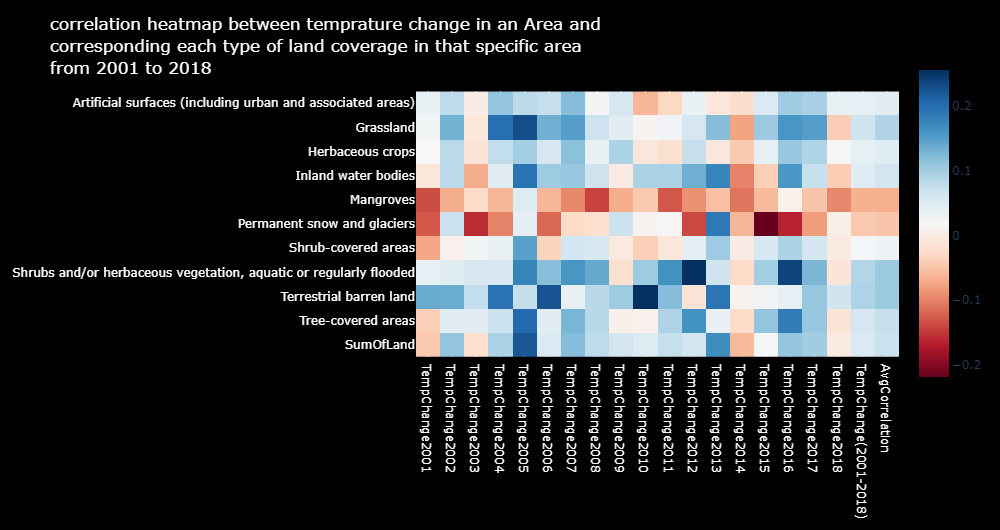

In [125]:
corrLandCov_temp_year_Wise=(mapTempLandCoverage[mapTempLandCoverage['Year']==2001])[mapTempLandCoverage.columns[3:]]
corrLandCov_temp_year_Wise=pd.DataFrame(corrLandCov_temp_year_Wise.corrwith(corrLandCov_temp_year_Wise['Value']),columns=['TempChange2001'])
corrLandCov_temp_year_Wise
for year in range(2002,2019):
    yearwisefiltered=((mapTempLandCoverage[mapTempLandCoverage['Year']==year])[mapTempLandCoverage.columns[3:]])
    corrLandCov_temp_year_Wise[f'TempChange{year}']=yearwisefiltered.corrwith(yearwisefiltered['Value'])    
yearwisefiltered=(mapTempLandCoverage[mapTempLandCoverage.columns[3:]])
corrLandCov_temp_year_Wise[f'TempChange(2001-2018)']=yearwisefiltered.corrwith(yearwisefiltered['Value'])
corrLandCov_temp_year_Wise[f'AvgCorrelation']=corrLandCov_temp_year_Wise.iloc[:,:-2].mean(axis=1)
corrLandCov_temp_year_Wise
fig = px.imshow(corrLandCov_temp_year_Wise[2:], color_continuous_scale='RdBu')
fig.update_layout(title='correlation heatmap between temprature change in an Area and<br>corresponding each type of land coverage in that specific area<br>from 2001 to 2018',
                  title_font_color='white',
                  height=530,
                  width=1000,
                  paper_bgcolor='black',
                  plot_bgcolor='black',
                  xaxis=dict(color='white'),
                  yaxis=dict(color='white'),
                  
                 )
fig.show('png')

regression analysis
1. in regression analysis  model could hardly fit with data
2. score is found out to be only 0.02

In [126]:
import numpy as np
from sklearn.linear_model import LinearRegression

0.025637636284143284


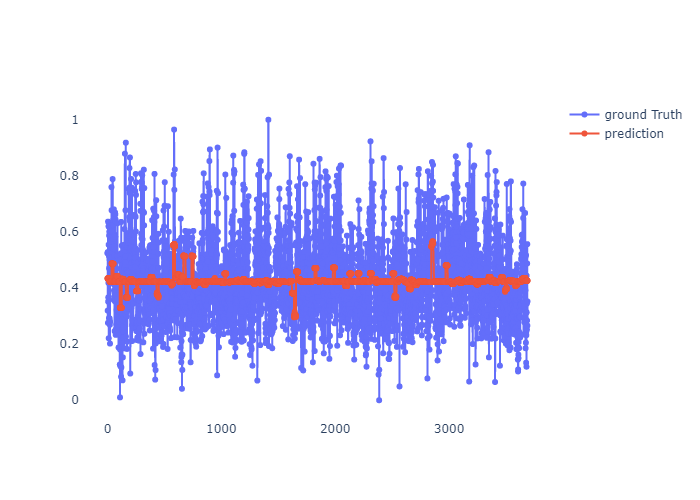

In [127]:
X=mapTempLandCoverage.iloc[:,5:]
Y=mapTempLandCoverage[['Value']]
reg = LinearRegression().fit(X, Y)
print(reg.score(X, Y))
prediction=reg.predict(X)

fig=go.Figure()
fig = fig.add_trace(go.Scatter(x=np.arange(0,X.shape[0]), y=Y.values.reshape((1,-1))[0], mode='lines+markers',name='ground Truth'))
fig = fig.add_trace(go.Scatter(x=np.arange(0,X.shape[0]), y=prediction.reshape((1,-1))[0], mode='lines+markers',name='prediction'))

fig.update_layout({
    'plot_bgcolor':'black',
    'paper_bgcolor':'black'
})

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show('png')


### V.2 Let see How Much Correlation the Change in Temperature have With Land Fires.

1. fires data has 17 no of columns.
2. out of them Area, Area code, Year, year code, are very intuistic.
3. item column has 7 types of category which are 'Closed shrubland','Grassland', 'Humid Tropical Forest','Open shrubland','Other Forest', and 'Savana' and these are distributed uniformly.
4. Unit column representing the data are stored in hectares units.
5. Flag column representing how data is collected: "Calculated Data" and "Aggregate, may include official, semi-official, estimated or calculated data"
6. Each value of Element column are 'Burned Area', representing what is the value column data about.
7. In this analysis only Area, Area Code, Item, Year, Value are going to be analyzed.


In [128]:
landfiredf=pd.read_csv('fires_data_11-29-2021.csv')
landfiredf=landfiredf.replace('United States of America','United States')
landfiredf=landfiredf.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom')
landfiredf.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1990,1990,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
1,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1991,1991,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
2,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1992,1992,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
3,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1993,1993,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
4,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1994,1994,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN


1. item column values distribution is uniform 
2. item column value distribution for each area and for each year pair is also uniform.
3. flag column value are categorical and they are distributed un uniformly but all are considered for analysis.
4. next step is to pivot the table where each categorical value of Item column will represented as a separate column.
5. dataframe does not have any null values.

In [129]:
print('item column distribution\n\n',landfiredf[['Item']].value_counts())
print('*'*90)
print('item column distribution for each Year and Area\n\n',landfiredf[['Area','Year','Item']].groupby(['Area','Year']).count())
print('*'*90)
print('Flag column distribution\n\n',landfiredf[['Flag']].value_counts())
print('*'*90)
print('Element column distribution\n\n',landfiredf[['Element']].value_counts())
print('*'*90)
print('null value check\n\n',landfiredf.info())


item column distribution

 Item                 
Closed shrubland         6807
Grassland                6807
Humid tropical forest    6807
Open shrubland           6807
Other forest             6807
Savanna                  6807
Woody savanna            6807
dtype: int64
******************************************************************************************
item column distribution for each Year and Area

                   Item
Area        Year      
Afghanistan 1990     7
            1991     7
            1992     7
            1993     7
            1994     7
...                ...
Zimbabwe    2015     7
            2016     7
            2017     7
            2018     7
            2019     7

[6807 rows x 1 columns]
******************************************************************************************
Flag column distribution

 Flag
Fc      47177
A         472
dtype: int64
******************************************************************************************
Element 

In [130]:
landfiredf=pd.read_csv('fires_data_11-29-2021.csv')[['Area Code (ISO3)','Area','Item','Year','Value']]
landfiredf.head()

,Area Code (ISO3),Area,Item,Year,Value
0,AFG,Afghanistan,Humid tropical forest,1990,0.0
1,AFG,Afghanistan,Humid tropical forest,1991,0.0
2,AFG,Afghanistan,Humid tropical forest,1992,0.0
3,AFG,Afghanistan,Humid tropical forest,1993,0.0
4,AFG,Afghanistan,Humid tropical forest,1994,0.0


In [131]:
landfiredfpivot=pd.pivot_table(landfiredf, index=['Area','Area Code (ISO3)','Year'],columns=['Item'], values=['Value']).reset_index()
landfiredfpivot=pd.concat([landfiredfpivot[['Area','Area Code (ISO3)','Year']],landfiredfpivot.Value],axis=1)
landfiredfpivot.columns=['Area','Area Code (ISO3)','Year','Closed shrubland','Grassland','Humid tropical forest','Open shrubland','Other forest','Savanna','Woody savanna']
landfiredfpivot.head()


,Area,Area Code (ISO3),Year,Closed shrubland,Grassland,Humid tropical forest,Open shrubland,Other forest,Savanna,Woody savanna
0,Afghanistan,AFG,1990,557.9448,27973.4536,0.0,6983.8551,28.6531,211.0227,157.916
1,Afghanistan,AFG,1991,557.9448,27973.4536,0.0,6983.8551,28.6531,211.0227,157.916
2,Afghanistan,AFG,1992,557.9448,27973.4536,0.0,6983.8551,28.6531,211.0227,157.916
3,Afghanistan,AFG,1993,557.9448,27973.4536,0.0,6983.8551,28.6531,211.0227,157.916
4,Afghanistan,AFG,1994,557.9448,27973.4536,0.0,6983.8551,28.6531,211.0227,157.916


 from distribution of year and different type of forest and savanna fires it is found that.
1. only data of year 1990 to 2019 are available.
2. value of each type of forest fires data are hectares units. bascically says how much hectares of forest has burned down.
3. histogram of the each column value are plotted below.
4. it is observed that the distribution of year is not uniform from 1990 to 2012. after 2012 to 2019 the ditribution is uniform.
5. the distribution all type of forest fire land data are right skewed.



In [132]:
landfiredfpivot.describe()

,Year,Closed shrubland,Grassland,Humid tropical forest,Open shrubland,Other forest,Savanna,Woody savanna
count,6807.000000,6.807000e+03,6.807000e+03,6.807000e+03,6.807000e+03,6.807000e+03,6.807000e+03,6.807000e+03
mean,2004.636404,1.454022e+04,9.991928e+05,1.663995e+05,2.005901e+05,6.579953e+04,1.150510e+06,2.875393e+05
std,8.610154,1.220393e+05,4.114082e+06,8.775785e+05,3.042755e+06,3.743402e+05,4.728356e+06,1.408044e+06
min,1990.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1997.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2005.000000,0.000000e+00,1.154113e+03,0.000000e+00,0.000000e+00,2.850000e+00,2.939824e+02,1.266568e+02
75%,2012.000000,8.556640e+01,7.347520e+04,1.738074e+03,2.277925e+02,2.588632e+03,4.421414e+04,1.684790e+04
max,2019.000000,3.052883e+06,7.639979e+07,1.057238e+07,1.052085e+08,6.978584e+06,4.600093e+07,1.994236e+07


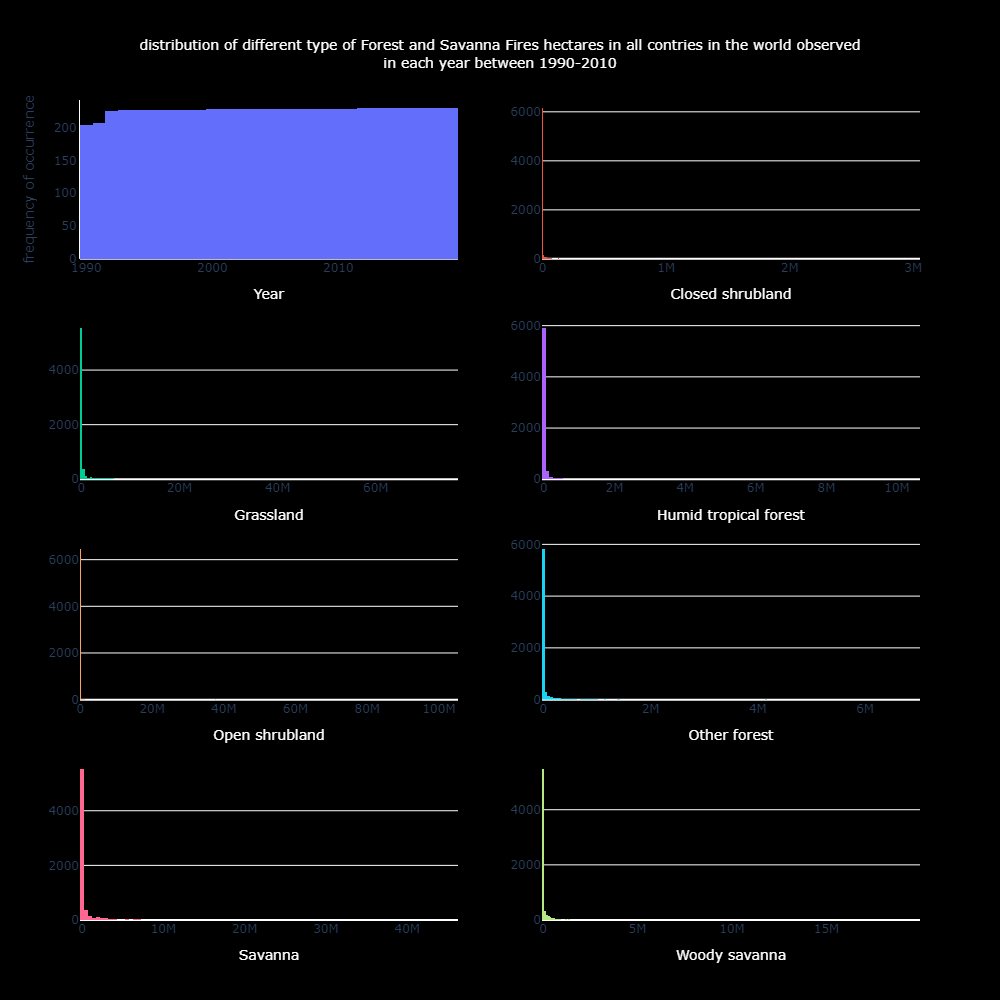

In [133]:
fig=make_subplots(rows=4, cols=2,
                 # subplot_titles=[f"{colname}<br>Land Coverage in 1000 hectares" for colname in landCoveragePivot.columns[3:]]
                 )
for i,colname in enumerate(landfiredfpivot.columns[2:]):
    fig.append_trace(go.Histogram(x=landfiredfpivot[colname],
                                  hovertemplate='%{x}:'),
                                 i//2+1,i%2+1
                                )
    # fig.update_yaxes(title_text="frequency of occurrence",title=dict(font=dict(size=14,color='white')), row=i//2+1, col=i%2+1,)
    fig.update_xaxes(title_text=f'{colname}',title=dict(font=dict(size=14,color='white')),row=i//2+1,col=i%2+1)

# fig.update_yaxes(title_text="frequency of occurrence",title=dict(font=dict(size=14,color='white')), row=6, col=1,)
# fig.update_xaxes(title_text=f'Year',title=dict(font=dict(size=14,color='white')),row=6,col=1)
fig.update_layout(
    height=1000,
    width=1000,
    title_text='distribution of different type of Forest and Savanna Fires hectares in all contries in the world observed<br>in each year between 1990-2010 ',
    yaxis=dict(title='frequency of occurrence',showline=True),   
    title=dict(x=0.5,xanchor='center',font=dict(color='white',size=14)),
    paper_bgcolor='black',
    plot_bgcolor='black',
    showlegend=False
)
fig.show('png')

lets see how many countries has data of each year from 1990 to 2019.
1. There are total 197 countries where data of each year from 1990 to 2019 are available.
2. lets exclude countries where data of each year from  1990 to 2019 are not available.


In [134]:
AreaToYearcount=landfiredfpivot[['Area','Year']].groupby(['Area']).count().sort_values('Year')
AreaToYearcount[AreaToYearcount['Year']==30]
YearCountForEachAreaTemp=filteredData[(filteredData['Year']<=2019) & (filteredData['Year']>=1990)][['Area','Year']].groupby(['Area']).count().sort_values('Year')
print('countries 30 years of data \n\n',YearCountForEachAreaTemp[YearCountForEachAreaTemp['Year']!=30].index)
mapTempForestFire=filteredData[(filteredData['Year']<=2019) & (filteredData['Year']>=1990)]
mapTempForestFire=mapTempForestFire[(~mapTempForestFire.Area.isin(YearCountForEachAreaTemp[YearCountForEachAreaTemp['Year']!=30].index))].reset_index(drop=True)
# mapTempForestFire.head()
mapTempForestFire=pd.merge(mapTempForestFire,landfiredfpivot,on=['Area','Year','Area Code (ISO3)'])
# mapTempForestFire.drop(columns=['Area Code (ISO3)_y'] ,axis=1,inplace=True)
mapTempForestFire.drop(columns=['ChangeDir'],inplace=True)
mapTempForestFire['SumofForestFire']=mapTempLandCoverage.iloc[:,5:].sum(axis=1)
mapTempForestFire.head()

countries 30 years of data 

 Index(['Pacific Islands Trust Territory', 'USSR', 'Yugoslav SFR', 'Yemen',
       'Tokelau', 'Ethiopia PDR', 'Nauru', 'Czechoslovakia', 'Niue',
       'Midway Island', 'South Sudan', 'Sudan', 'Belgium-Luxembourg', 'Rwanda',
       'Burundi', 'Serbia', 'Montenegro', 'Serbia and Montenegro', 'Aruba',
       'Luxembourg', 'Belgium', 'Pitcairn', 'Timor-Leste', 'Palau',
       'Sudan (former)', 'Eritrea', 'Christmas Island', 'Norfolk Island',
       'Cayman Islands', 'Sao Tome and Principe', 'Cook Islands',
       'South Georgia and the South Sandwich Islands', 'Czechia',
       'American Samoa', 'Slovakia', 'Samoa', 'Ethiopia', 'Solomon Islands',
       'Ukraine', 'Slovenia', 'North Macedonia', 'Equatorial Guinea',
       'Estonia', 'Croatia', 'Armenia', 'Azerbaijan', 'Uzbekistan',
       'Kazakhstan', 'Bosnia and Herzegovina', 'Turkmenistan', 'Kiribati',
       'Lithuania', 'Tajikistan', 'Kyrgyzstan', 'Georgia', 'Latvia',
       'Russian Federation', 'Belarus

,Area,Year,Area Code (ISO3),Value,AbsValue,Closed shrubland,Grassland,Humid tropical forest,Open shrubland,Other forest,Savanna,Woody savanna,SumofForestFire
0,Afghanistan,1990.0,AFG,0.796,0.796,557.9448,27973.4536,0.0,6983.8551,28.6531,211.0227,157.916,0.292132
1,Afghanistan,1991.0,AFG,-0.133,0.133,557.9448,27973.4536,0.0,6983.8551,28.6531,211.0227,157.916,0.292219
2,Afghanistan,1992.0,AFG,-0.297,0.297,557.9448,27973.4536,0.0,6983.8551,28.6531,211.0227,157.916,0.291891
3,Afghanistan,1993.0,AFG,0.223,0.223,557.9448,27973.4536,0.0,6983.8551,28.6531,211.0227,157.916,0.291752
4,Afghanistan,1994.0,AFG,0.459,0.459,557.9448,27973.4536,0.0,6983.8551,28.6531,211.0227,157.916,0.291197


minmax normalization of dataframe(mapTempForestFire) which exhibit map between change in temperature and forest fired land in hectares per each specific area and per each specific year from 1990-2019

In [135]:
mapTempForestFire.iloc[:,3:]=MinMaxScaler().fit_transform(mapTempForestFire.iloc[:,3:])
mapTempForestFire.head()

,Area,Year,Area Code (ISO3),Value,AbsValue,Closed shrubland,Grassland,Humid tropical forest,Open shrubland,Other forest,Savanna,Woody savanna,SumofForestFire
0,Afghanistan,1990.0,AFG,0.323481,0.149240,0.000183,0.000366,0.0,0.000066,0.000004,0.000005,0.000008,0.048180
1,Afghanistan,1991.0,AFG,0.184804,0.024779,0.000183,0.000366,0.0,0.000066,0.000004,0.000005,0.000008,0.048194
2,Afghanistan,1992.0,AFG,0.160322,0.055566,0.000183,0.000366,0.0,0.000066,0.000004,0.000005,0.000008,0.048140
3,Afghanistan,1993.0,AFG,0.237946,0.041674,0.000183,0.000366,0.0,0.000066,0.000004,0.000005,0.000008,0.048117
4,Afghanistan,1994.0,AFG,0.273175,0.085977,0.000183,0.000366,0.0,0.000066,0.000004,0.000005,0.000008,0.048026


by considering temperature and corresponding land fire data of 197 contries it is found that there are very positive and nagative correlation between change in temperature and different type of land fire data.
1. maximum positive correlation -0.255 found is between 'Other Forest' data and change in temperature of 1998.
2. maximum nagative correlation 0.268 found is between 'Closed Shrubland' data and change in temperatur of 2011.
3. from the above observation it is clear there strong correlation between them.



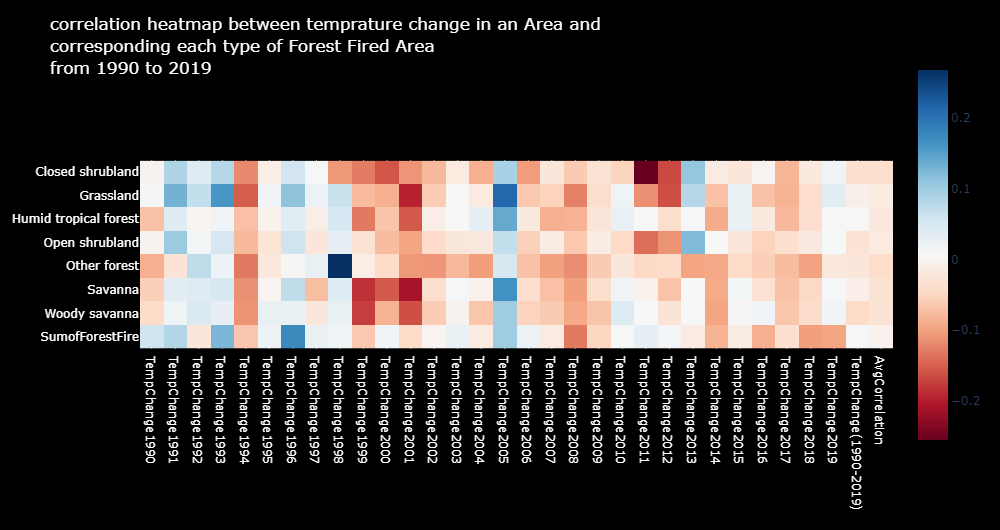

In [136]:
corrLandFire_temp_year_Wise=(mapTempForestFire[mapTempForestFire['Year']==1990])[mapTempForestFire.columns[3:]]
corrLandFire_temp_year_Wise=pd.DataFrame(corrLandFire_temp_year_Wise.corrwith(corrLandFire_temp_year_Wise['Value']),columns=['TempChange1990'])
# corrLandCov_temp_year_Wise
for year in range(1990,2020):
    yearwisefiltered=((mapTempForestFire[mapTempForestFire['Year']==year])[mapTempForestFire.columns[3:]])
    corrLandFire_temp_year_Wise[f'TempChange{year}']=yearwisefiltered.corrwith(yearwisefiltered['Value'])  
yearwisefiltered=(mapTempForestFire[mapTempForestFire.columns[3:]])
corrLandFire_temp_year_Wise[f'TempChange(1990-2019)']=yearwisefiltered.corrwith(yearwisefiltered['Value'])
corrLandFire_temp_year_Wise[f'AvgCorrelation']=corrLandFire_temp_year_Wise.iloc[:,:-1].mean(axis=1)
corrLandFire_temp_year_Wise
fig = px.imshow(corrLandFire_temp_year_Wise[2:], color_continuous_scale='RdBu')
fig.update_layout(title='correlation heatmap between temprature change in an Area and<br>corresponding each type of Forest Fired Area<br>from 1990 to 2019',
                  title_font_color='white',
                  height=530,
                  width=1000,
                  paper_bgcolor='black',
                  plot_bgcolor='black',
                  xaxis=dict(color='white'),
                  yaxis=dict(color='white'),
                  
                 )
fig.show('png')

### V.3 Lets see How Much Correlation The Change In Temperature have With Burning Waste Disposal Data 

1. this dataset contains data about incineration of waste disposal. how much kilotonnes of waste disposal incinerated in each year and in each Area are tabulated in this dataframe.
2. this dataset contains 14 no of columns. and their description are mention below.

	* Domain: Waste Disposal
	* Area Code (ISO3)
	* Area: the country name (all countries available were selected)
	* Element: Emissions (CO2)
	* Item: Incineration
	* Year: 1990 to 2019
	* Unit: kilotonnes
	* Value: CO2 emissions - absolute number
	* Flag Description: "Calculated Data" and "Aggregate, may include official, semi-official, estimated or calculated data"
    
3. Item column has only one categorical value that is 'Incineration', that mean only waste disposal which are incinerated to produce energy are tabulated here 
4. Unit column represent unit with which value column, which is representing numerical value of incineration of waste disposal, are measuered.
5. So we only going to considered Area, Area Code (ISO3), Year, Value column for our analysis

In [137]:
wasteDisposaldf=pd.read_csv('waste_disposal_data_11-29-2021.csv')
wasteDisposaldf=wasteDisposaldf[['Area','Area Code (ISO3)','Year','Value']]
wasteDisposaldf=wasteDisposaldf.replace('United States of America','United States')
wasteDisposaldf=wasteDisposaldf.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom')

(wasteDisposaldf.head())


,Area,Area Code (ISO3),Year,Value
0,Afghanistan,AFG,1990,0.0
1,Afghanistan,AFG,1991,0.0
2,Afghanistan,AFG,1992,0.0
3,Afghanistan,AFG,1993,0.0
4,Afghanistan,AFG,1994,0.0


1. dataset does not contains any null values.
2. data available from year 1990 to 2019.
3. values column, which represent how much kilotonnes of waste disposal are incirnerated for energy production, has very skewed distribution of data. median of the column values are 0.00 and max value is  11151.1 kilotonnes.
4. countries are there in that dataframe which have less than 30 number of years of data so those countries will be excluded from the analysis.



In [138]:
print(wasteDisposaldf.info())
print('*'*90)
print(wasteDisposaldf.describe())
print('*'*90)
print(pd.DataFrame(wasteDisposaldf[['Area','Year']].groupby(['Area']).count().sort_values('Year')).rename(columns={'Year':'YearCount'}))
print('*'*90)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6238 entries, 0 to 6237
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              6238 non-null   object 
 1   Area Code (ISO3)  6238 non-null   object 
 2   Year              6238 non-null   int64  
 3   Value             6238 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 195.1+ KB
None
******************************************************************************************
              Year         Value
count  6238.000000   6238.000000
mean   2004.677300    202.675467
std       8.603289   1066.676986
min    1990.000000      0.000000
25%    1997.000000      0.000000
50%    2005.000000      0.652579
75%    2012.000000     30.517272
max    2019.000000  11151.696410
******************************************************************************************
                YearCount
Area                     
Yugoslav SFR

In [139]:
AreaToYearcount=wasteDisposaldf[['Area','Year']].groupby(['Area']).count().sort_values('Year')
# AreaToYearcount[AreaToYearcount['Year']==30]
YearCountForEachAreaTemp=filteredData[(filteredData['Year']<=2019) & (filteredData['Year']>=1990)][['Area','Year']].groupby(['Area']).count().sort_values('Year')
# print('countries 30 years of data \n\n',YearCountForEachAreaTemp[YearCountForEachAreaTemp['Year']==30].index)
mapTempWasteDisposal=filteredData[(filteredData['Year']<=2019) & (filteredData['Year']>=1990)]
mapTempWasteDisposal=mapTempWasteDisposal[(mapTempWasteDisposal.Area.isin(YearCountForEachAreaTemp[YearCountForEachAreaTemp['Year']==30].index))].reset_index(drop=True)
# mapTempForestFire.head()
wasteDisposaldf.rename(columns={'Value':'WasteDisposal'},inplace=True)
mapTempWasteDisposal=pd.merge(mapTempWasteDisposal,wasteDisposaldf,on=['Area','Year','Area Code (ISO3)'])
# mapTempForestFire.drop(columns=['Area Code (ISO3)_y'] ,axis=1,inplace=True)
mapTempWasteDisposal.drop(columns=['ChangeDir'],inplace=True)
# mapTempForestFire['SumofForestFire']=mapTempLandCoverage.iloc[:,5:].sum(axis=1)
mapTempWasteDisposal.head()

,Area,Year,Area Code (ISO3),Value,AbsValue,WasteDisposal
0,Afghanistan,1990.0,AFG,0.796,0.796,0.0
1,Afghanistan,1991.0,AFG,-0.133,0.133,0.0
2,Afghanistan,1992.0,AFG,-0.297,0.297,0.0
3,Afghanistan,1993.0,AFG,0.223,0.223,0.0
4,Afghanistan,1994.0,AFG,0.459,0.459,0.0


1. from the below heat map of correlation it is found that there is very poor correlation between change in temperature in an area and corresponding kilotonnes of incirneration of waste disposal in that Area.
2. maximum correlation found is 1.74 in 2007, which is very poor to make any statement.


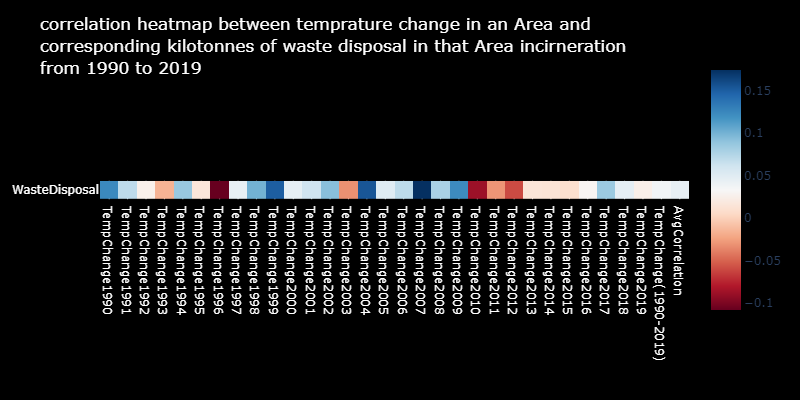

In [140]:
corrWasteDisposal_temp_year_Wise=(mapTempWasteDisposal[mapTempWasteDisposal['Year']==1990])[mapTempWasteDisposal.columns[3:]]
corrWasteDisposal_temp_year_Wise=pd.DataFrame(corrWasteDisposal_temp_year_Wise.corrwith(corrWasteDisposal_temp_year_Wise['Value']),columns=['TempChange1990'])
# corrLandCov_temp_year_Wise
for year in range(1991,2020):
    yearwisefiltered=((mapTempWasteDisposal[mapTempWasteDisposal['Year']==year])[mapTempWasteDisposal.columns[3:]])
    corrWasteDisposal_temp_year_Wise[f'TempChange{year}']=yearwisefiltered.corrwith(yearwisefiltered['Value'])  
yearwisefiltered=(mapTempWasteDisposal[mapTempWasteDisposal.columns[3:]])
corrWasteDisposal_temp_year_Wise[f'TempChange(1990-2019)']=yearwisefiltered.corrwith(yearwisefiltered['Value'])
corrWasteDisposal_temp_year_Wise[f'AvgCorrelation']=corrWasteDisposal_temp_year_Wise.iloc[:,:-1].mean(axis=1)
corrWasteDisposal_temp_year_Wise
fig = px.imshow(corrWasteDisposal_temp_year_Wise[2:], color_continuous_scale='RdBu')
fig.update_layout(title='correlation heatmap between temprature change in an Area and<br>corresponding kilotonnes of waste disposal in that Area incirneration  <br>from 1990 to 2019',
                  title_font_color='white',
                  height=400,
                  width=800,
                  paper_bgcolor='black',
                  plot_bgcolor='black',
                  xaxis=dict(color='white'),
                  yaxis=dict(color='white'),
                  
                 )
fig.show('png')

### V.4 Lets see How Much correlation Change In Temperature Have with different type of Energy consumed in that Area.

1. In this dataframe "value" column contains nemerical value which represent how much kilotonnes of 'Gas-Diesel oil', 'Motor Gasoline', 'Natural gas (including LNG)', 'Coal', 'Electricity', 'Liquefied petroleum gas (LPG)', 'Fuel oil', 'Gas-diesel oils used in fisheries', 'Fuel oil used in fisheries', are consumed in each Area and in each year.
2. data set contains 14 columns where description about each columns has mention below.
 
    * Domain: Energy Use
	* Area Code (ISO3)
	* Area: the country name (all countries available were selected)
	* Element: Emissions (CO2)
	* Item: 'Gas-Diesel oil', 'Motor Gasoline', 'Natural gas (including LNG)', 'Coal', 'Electricity', 'Liquefied petroleum gas (LPG)', 'Fuel oil', 'Gas-diesel oils used in fisheries', 'Fuel oil used in fisheries'
	* Year: 1970 to 2019
	* Unit: kilotonnes
	* Value: CO2 emissions - absolute number
	* Flag Description: "FAO estimate", "International reliable sources" and "Aggregate, may include official, semi-official, estimated or calculated data"
3. only Area, Area Code (ISO3), Year, Items, and Value are used in this analysis.

In [141]:
energyUsed=pd.read_csv('energy_use_data_11-29-2021.csv')
energyUsed=energyUsed[['Area','Area Code (ISO3)','Year','Item','Value']]
energyUsed=energyUsed.replace('United States of America','United States')
energyUsed=energyUsed.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom')
energyUsed.head()

,Area,Area Code (ISO3),Year,Item,Value
0,Afghanistan,AFG,1990,Gas-Diesel oil,231.4918
1,Afghanistan,AFG,1991,Gas-Diesel oil,188.5317
2,Afghanistan,AFG,1992,Gas-Diesel oil,47.9904
3,Afghanistan,AFG,1993,Gas-Diesel oil,38.6116
4,Afghanistan,AFG,1994,Gas-Diesel oil,31.4465


The Distribution of number of different category of energy consumption for each year and Area are not uniform here.
1. reason of non uniform distribution is that some of the country does not have the data of one or more category of energy consumption.
2. In this dataset for each Area and Year there should be 9 different category of energy consumption data.
3. from the below table it is clear that lot of row contains null values.
4. 0.03 percent row are there where every column values are not null. except that every row has a null values.



In [142]:
energyUsedPivot=pd.pivot_table(energyUsed,index=['Area','Area Code (ISO3)','Year'],columns=['Item'],values=['Value']).reset_index()
energyUsedPivot=pd.concat([energyUsedPivot[['Area','Area Code (ISO3)','Year']],energyUsedPivot.Value],axis=1)
energyUsedPivot.columns=['Area','Area Code (ISO3)','Year','Coal','Electricity','Fuel oil','Fuel oil used in fisheries','Gas-Diesel oil','Gas-diesel oils used in fisheries','Liquefied petroleum gas (LPG)','Motor Gasoline','Natural gas (including LNG)']
energyUsedPivot.head()

,Area,Area Code (ISO3),Year,Coal,Electricity,Fuel oil,Fuel oil used in fisheries,Gas-Diesel oil,Gas-diesel oils used in fisheries,Liquefied petroleum gas (LPG),Motor Gasoline,Natural gas (including LNG)
0,Afghanistan,AFG,1970,NaN,4.1799,NaN,NaN,NaN,NaN,NaN,1.1776,NaN
1,Afghanistan,AFG,1971,NaN,4.5282,NaN,NaN,NaN,NaN,NaN,1.1448,NaN
2,Afghanistan,AFG,1972,NaN,5.5732,NaN,NaN,NaN,NaN,NaN,0.9159,NaN
3,Afghanistan,AFG,1973,NaN,5.5732,NaN,NaN,NaN,NaN,NaN,0.7632,NaN
4,Afghanistan,AFG,1974,NaN,6.6182,NaN,NaN,NaN,NaN,NaN,0.9377,NaN


In [143]:
energyUsedPivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9498 entries, 0 to 9497
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Area                               9498 non-null   object 
 1   Area Code (ISO3)                   9498 non-null   object 
 2   Year                               9498 non-null   int64  
 3   Coal                               4304 non-null   float64
 4   Electricity                        6061 non-null   float64
 5   Fuel oil                           6418 non-null   float64
 6   Fuel oil used in fisheries         467 non-null    float64
 7   Gas-Diesel oil                     8160 non-null   float64
 8   Gas-diesel oils used in fisheries  747 non-null    float64
 9   Liquefied petroleum gas (LPG)      7431 non-null   float64
 10  Motor Gasoline                     8756 non-null   float64
 11  Natural gas (including LNG)        3787 non-null   float

In [144]:
1-energyUsedPivot.isnull().any(axis=1).sum()/9498

0.03232259423036432

In [145]:
1-energyUsedPivot.isnull().all(axis=1).sum()/9498

1.0

1. since most of energy consumption data are null values for majority country of the world, so energy consumption data of all category are added up to find correlation between change in temperature.
2. and all the null values are replaced by value zero.
3. replacing the null values with zero also make sense since most of the time it may be possilble there are zero or negligible consumption of a perticular category of energy.

In [146]:
energyUsedPivot.fillna(0,inplace=True)
energyUsedPivot['TotalEnergyConsumption']=energyUsedPivot.iloc[:,3:].sum(axis=1)
energyUsedPivot.head()

,Area,Area Code (ISO3),Year,Coal,Electricity,Fuel oil,Fuel oil used in fisheries,Gas-Diesel oil,Gas-diesel oils used in fisheries,Liquefied petroleum gas (LPG),Motor Gasoline,Natural gas (including LNG),TotalEnergyConsumption
0,Afghanistan,AFG,1970,0.0,4.1799,0.0,0.0,0.0,0.0,0.0,1.1776,0.0,5.3575
1,Afghanistan,AFG,1971,0.0,4.5282,0.0,0.0,0.0,0.0,0.0,1.1448,0.0,5.6730
2,Afghanistan,AFG,1972,0.0,5.5732,0.0,0.0,0.0,0.0,0.0,0.9159,0.0,6.4891
3,Afghanistan,AFG,1973,0.0,5.5732,0.0,0.0,0.0,0.0,0.0,0.7632,0.0,6.3364
4,Afghanistan,AFG,1974,0.0,6.6182,0.0,0.0,0.0,0.0,0.0,0.9377,0.0,7.5559


In [147]:
energyUsedPivot.describe()

,Year,Coal,Electricity,Fuel oil,Fuel oil used in fisheries,Gas-Diesel oil,Gas-diesel oils used in fisheries,Liquefied petroleum gas (LPG),Motor Gasoline,Natural gas (including LNG),TotalEnergyConsumption
count,9498.000000,9498.000000,9498.000000,9498.000000,9498.000000,9498.000000,9498.000000,9498.000000,9498.000000,9498.000000,9498.000000
mean,1996.989156,648.339900,1383.649875,118.309679,14.168932,1466.017902,84.873143,55.144369,241.839399,179.821005,4192.164204
std,13.836817,4718.335921,8832.549349,450.056071,136.533618,5484.215465,593.614767,334.879021,1462.480771,992.692818,18127.178149
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1986.000000,0.000000,0.000000,0.000000,0.000000,3.186300,0.000000,0.035700,1.696525,0.000000,20.759900
50%,1998.000000,0.000000,5.868050,5.315800,0.000000,46.102500,0.000000,2.042950,9.089150,0.000000,206.669200
75%,2009.000000,16.031350,192.196700,46.904400,0.000000,573.534000,0.000000,11.711900,33.781375,15.806175,1642.847025
max,2019.000000,69167.040700,197674.559300,9244.176000,3649.331200,122672.550000,13420.164000,7881.986500,38374.875000,25806.000000,241645.512200


from the below histogram plot to visualize the distribution of each column value it is found that 
1. number of year of data available for each country and Year pair is not uniform.
2. all the Energy data consumption distribution are right skewed means only few country are there whose consumption rate of some Energy category are much more high than other countries.
3. the median of the electricity and fuel oil consumption are arount 5 kilotonnes.
4. the median of LPG is 2.0429 kilotonnes.
5. the median of motor gasoline is 9.08 kilotonnes.
6. the median of Gas-Disel oil is 46.1025 kilotonnes.

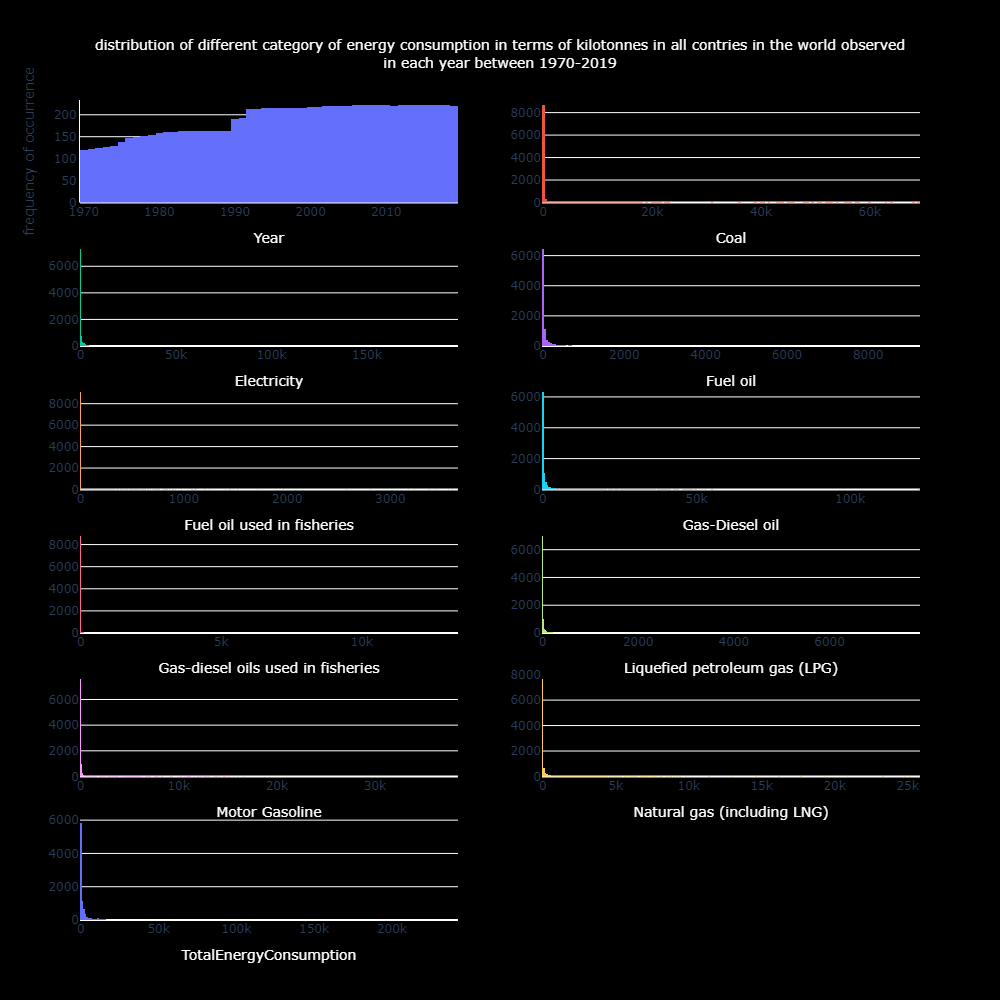

In [148]:
fig=make_subplots(rows=6, cols=2)
for i,colname in enumerate(energyUsedPivot.columns[2:]):
    fig.append_trace(go.Histogram(x=energyUsedPivot[colname],
                                  hovertemplate='%{x}:'),
                                 i//2+1,i%2+1
                                )
    # fig.update_yaxes(title_text="frequency of occurrence",title=dict(font=dict(size=14,color='white')), row=i//2+1, col=i%2+1,)
    fig.update_xaxes(title_text=f'{colname}',title=dict(font=dict(size=14,color='white')),row=i//2+1,col=i%2+1)

# fig.update_yaxes(title_text="frequency of occurrence",title=dict(font=dict(size=14,color='white')), row=6, col=1,)
# fig.update_xaxes(title_text=f'Year',title=dict(font=dict(size=14,color='white')),row=6,col=1)
fig.update_layout(
    height=1000,
    width=1000,
    title_text='distribution of different category of energy consumption in terms of kilotonnes in all contries in the world observed<br>in each year between 1970-2019',
    yaxis=dict(title='frequency of occurrence',showline=True),   
    title=dict(x=0.5,xanchor='center',font=dict(color='white',size=14)),
    paper_bgcolor='black',
    plot_bgcolor='black',
    showlegend=False
)
fig.show('png')

In [149]:
YearCountEachArea=energyUsedPivot[['Area','Year']].groupby(['Area']).count()
AreaToInclude=YearCountEachArea[YearCountEachArea.Year==50].index
mapEnergyConsumption=pd.merge(filteredData,energyUsedPivot[energyUsedPivot.Area.isin(AreaToInclude)],on=['Area','Area Code (ISO3)','Year'])
mapEnergyConsumption.drop(columns=['ChangeDir'],inplace=True)
mapEnergyConsumption.head()

,Area,Year,Area Code (ISO3),Value,AbsValue,Coal,Electricity,Fuel oil,Fuel oil used in fisheries,Gas-Diesel oil,Gas-diesel oils used in fisheries,Liquefied petroleum gas (LPG),Motor Gasoline,Natural gas (including LNG),TotalEnergyConsumption
0,Afghanistan,1970.0,AFG,0.852,0.852,0.0,4.1799,0.0,0.0,0.0,0.0,0.0,1.1776,0.0,5.3575
1,Afghanistan,1971.0,AFG,0.621,0.621,0.0,4.5282,0.0,0.0,0.0,0.0,0.0,1.1448,0.0,5.6730
2,Afghanistan,1972.0,AFG,-1.135,1.135,0.0,5.5732,0.0,0.0,0.0,0.0,0.0,0.9159,0.0,6.4891
3,Afghanistan,1973.0,AFG,0.214,0.214,0.0,5.5732,0.0,0.0,0.0,0.0,0.0,0.7632,0.0,6.3364
4,Afghanistan,1974.0,AFG,-0.508,0.508,0.0,6.6182,0.0,0.0,0.0,0.0,0.0,0.9377,0.0,7.5559


normalizing the dataframe

In [150]:
mapEnergyConsumption.iloc[:,3:]=MinMaxScaler().fit_transform(mapEnergyConsumption.iloc[:,3:])
mapEnergyConsumption.head()

,Area,Year,Area Code (ISO3),Value,AbsValue,Coal,Electricity,Fuel oil,Fuel oil used in fisheries,Gas-Diesel oil,Gas-diesel oils used in fisheries,Liquefied petroleum gas (LPG),Motor Gasoline,Natural gas (including LNG),TotalEnergyConsumption
0,Afghanistan,1970.0,AFG,0.562367,0.292038,0.0,0.000021,0.0,0.0,0.0,0.0,0.0,0.000071,0.0,0.000024
1,Afghanistan,1971.0,AFG,0.513364,0.212766,0.0,0.000023,0.0,0.0,0.0,0.0,0.0,0.000069,0.0,0.000025
2,Afghanistan,1972.0,AFG,0.140857,0.389156,0.0,0.000028,0.0,0.0,0.0,0.0,0.0,0.000055,0.0,0.000029
3,Afghanistan,1973.0,AFG,0.427026,0.073095,0.0,0.000028,0.0,0.0,0.0,0.0,0.0,0.000046,0.0,0.000028
4,Afghanistan,1974.0,AFG,0.273865,0.173988,0.0,0.000033,0.0,0.0,0.0,0.0,0.0,0.000056,0.0,0.000033


1. from this correlation heatmap it is clear that the correlation between change in temperature and different category and total energy consumption are very poor.
2. in the year of 2016 maximum correlation found is 0.30 with LPG 
3. in the year of 1979 maximum negative correlation found, that is 0.29 with 'natural gas'


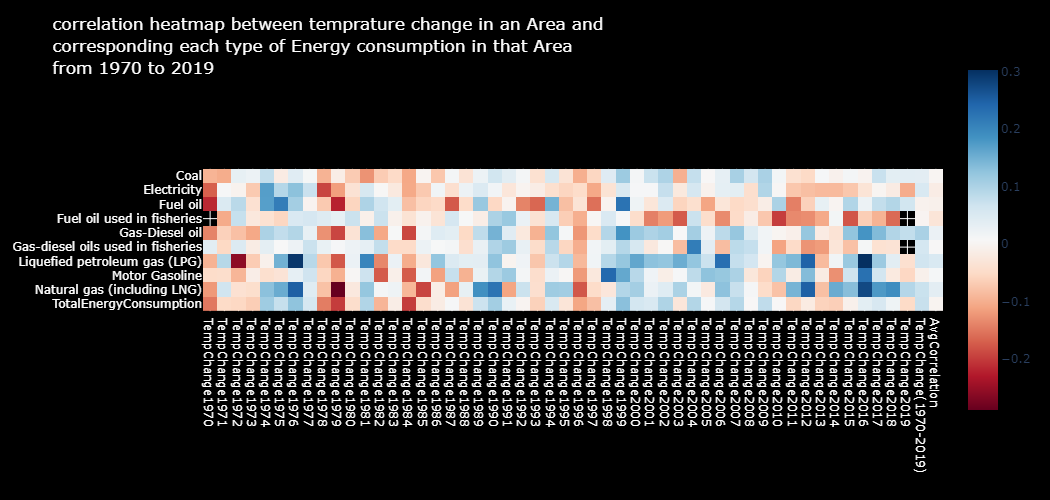

In [151]:
corrEnergyConsump_temp_year_Wise=(mapEnergyConsumption[mapEnergyConsumption['Year']==1970])[mapEnergyConsumption.columns[3:]]
corrEnergyConsump_temp_year_Wise=pd.DataFrame(corrEnergyConsump_temp_year_Wise.corrwith(corrEnergyConsump_temp_year_Wise['Value']),columns=['TempChange1970'])

for year in range(1971,2020):
    yearwisefiltered=((mapEnergyConsumption[mapEnergyConsumption['Year']==year])[mapEnergyConsumption.columns[3:]])
    corrEnergyConsump_temp_year_Wise[f'TempChange{year}']=yearwisefiltered.corrwith(yearwisefiltered['Value'])  
yearwisefiltered=(mapEnergyConsumption[mapEnergyConsumption.columns[3:]])
corrEnergyConsump_temp_year_Wise[f'TempChange(1970-2019)']=yearwisefiltered.corrwith(yearwisefiltered['Value'])
corrEnergyConsump_temp_year_Wise[f'AvgCorrelation']=corrEnergyConsump_temp_year_Wise.iloc[:,:-1].mean(axis=1)

fig = px.imshow(corrEnergyConsump_temp_year_Wise[2:], color_continuous_scale='RdBu')
fig.update_layout(title='correlation heatmap between temprature change in an Area and<br>corresponding each type of Energy consumption in that Area<br>from 1970 to 2019',
                  title_font_color='white',
                  height=500,
                  width=1050,
                  paper_bgcolor='black',
                  plot_bgcolor='black',
                  xaxis=dict(color='white'),
                  yaxis=dict(color='white'),
                  
                 )
fig.show('png')

## VI. How does the Seasonal Temperature Change look like.

1. For this Analysis Only Certain No of Countries/Area are Considered. 
2. those are Russian-Federation, China, India, Germany, France, Italy, United Kingdom, Brazil, United States, Canada, Australia, South Africa, and Japan.
3. there are total 14 columns and out of them Area Code (ISO3), Area, Months, Year, Value.
4. and Flag value 'Fc' are selected for analysis.
5. In months column's values represent the quarter from which, the change in temperature of each Year belongs .


In [152]:
AreaToAnalyze=['Russian Federation','China','Germany','India','France','Italy','United Kingdom','Brazil','United States','Canada','Australia','South Africa','Japan']
temp2=pd.read_csv('temperature_change_data_11-29-2021.csv')
temp2=temp2[(temp2['Area'].isin(AreaToAnalyze)) & (temp2['Flag']=='Fc')&(temp2['Months']!='Meteorological year')][['Area','Area Code (ISO3)','Months','Year','Value']].reset_index(drop=True)
print('shape of the dataframe',temp2.shape)
MonthToQuarter={'Dec–Jan–Feb':'Q1',
                'Mar–Apr–May':'Q2',
                'Jun–Jul–Aug':'Q3',
                'Sep–Oct–Nov':'Q4'}
temp2['QuarterWiseData']=temp2.apply(lambda x : str(x['Year'])+'_'+MonthToQuarter[x['Months']],axis=1 )
temp2['QuarterNo']=temp2.apply(lambda x : MonthToQuarter[x['Months']],axis=1 )

temp2.head()

C:\Users\adadi\anaconda3\envs\HPOmenChallenge\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning:

Columns (0,1,2,3,5,7,10,12,13) have mixed types.Specify dtype option on import or set low_memory=False.



shape of the dataframe (2516, 5)


,Area,Area Code (ISO3),Months,Year,Value,QuarterWiseData,QuarterNo
0,Australia,AUS,Dec–Jan–Feb,1961.0,0.042,1961.0_Q1,Q1
1,Australia,AUS,Dec–Jan–Feb,1962.0,0.116,1962.0_Q1,Q1
2,Australia,AUS,Dec–Jan–Feb,1963.0,-0.285,1963.0_Q1,Q1
3,Australia,AUS,Dec–Jan–Feb,1964.0,-0.191,1964.0_Q1,Q1
4,Australia,AUS,Dec–Jan–Feb,1965.0,-0.017,1965.0_Q1,Q1


1. the below spline plot the seasonal change in temperature of coutries like 'Russian Federation', 'China', 'Germany', 'India', 'France', 'Italy', 'United Kingdom', 'Brazil', 'United States', 'Canada', 'Australia', 'South Africa', and 'Japan' is shown here. 
2. seasonal obserbation of 10 year data has been visualized here.
3. each season is denoted as quarter where each quarter representing three consecutive month. first quarter starting from Dec-Jan_Feb.43. 
4. In Russia threre is seasonality in change in temperature after 2014 where highest change in temperature seen in Quarter-1 and lowest change in temperature seen in Quarter-3 and 4 .
5. In India highest Change in Temperature seen most of time in Q4 and lowest change in temperature in all rest of the Quarter.
6. In China higest change in Tempearture seen in Quarter-2.
7. In Australia highest change in Temperature seen in Quarter-4 and lowest change in temperature seeen in Qurter 2 and 3.
8. In Canada highest change in temperature seen in Quarter-1.
9. In Germany highest change in temperature seen in Quarter-2 and 3.
10. In South Africa highest change in temperature seen in quarter-2 and 1.



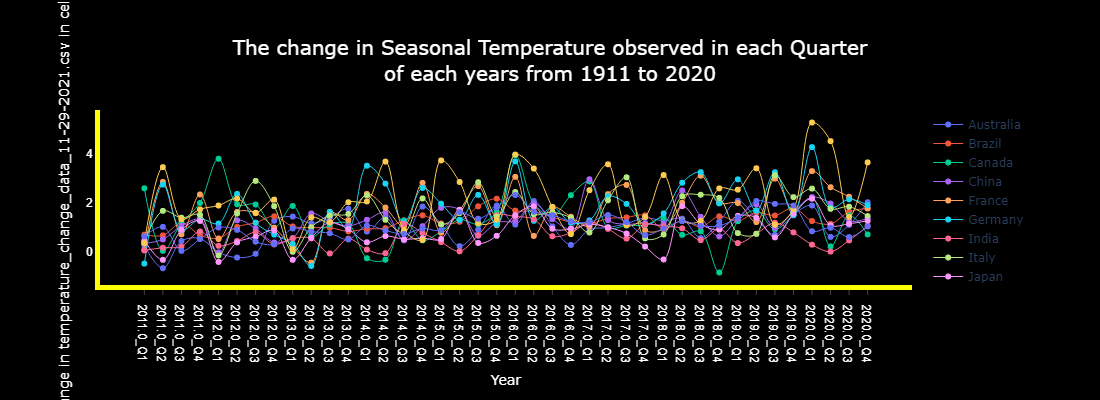

In [153]:
fig = go.Figure()
for i,Area in enumerate( temp2.Area.unique()):
    AreaWiseFiltered_sorted=temp2[(temp2['Area']==Area) & (temp2['Year'].isin(range(2011,2021)))].sort_values(['QuarterWiseData'])
    fig.add_trace(go.Scatter(x=AreaWiseFiltered_sorted.QuarterWiseData, y=AreaWiseFiltered_sorted.Value,
                    mode='markers+lines',
                    name=Area,
                    line=dict( width=1),
                            connectgaps=True,
                            line_shape='spline'
                            ),)

fig.update_layout(title_text='The change in Seasonal Temperature observed in each Quarter<br>of each years from 1911 to 2020',
                    titlefont=dict(
                                    size=20,
                                    color='white'
                                    ),
                    title=dict(x=0.5,xanchor='center'),
                    xaxis_title='Year',
                    yaxis_title='change in temperature_change_data_11-29-2021.csv in celsius',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=400,
                    width=1100
                    )
               
fig.update_layout(
        xaxis=dict(
                showline=True,
                showgrid=True,
                gridcolor="rgba(255,0,0,0.25)",
                gridwidth=0.1,
                showticklabels=True,
                linecolor='yellow',
                linewidth=5,
                ticks='outside',
                tickfont=dict(
                            family='Arial',
                            size=12,
                            color='white',
                            ),
                titlefont=dict(
                            size=14,
                            color='white'
                            )
                            ),
        yaxis=dict(
            tickfont=dict(
                        family='Arial',
                        size=12,
                        color='white',
                        ),
            titlefont=dict(
                        size=14,
                        color='white'
                        ),
            linecolor='yellow',
            linewidth=5,
            showgrid=False,
            zeroline=False,
            showline=True,
            showticklabels=True,
            gridwidth=0.1,

            ),
            autosize=True,
            margin=dict(
                        autoexpand=True,
                        l=100,
                        r=100,
                        t=110,
                        b=100
                        ),
            showlegend=True,
            
            )                             
                            
fig.show('png')

## VII. How does this vary by continent? Particularly South America?

In [154]:
SACountriesToInclude=['Brazil','Peru','Argentina','Colombia','Chile','Venezuela (Bolivarian Republic of)','Guyana','Ecuador','Bolivia (Plurinational State of)','Uruguay','Paraguay','Suriname','French Guyana','Aruba','Trinidad and Tobago']
tempSA=pd.read_csv('temperature_change_data_11-29-2021.csv')
tempSA=tempSA[(tempSA['Area'].isin(SACountriesToInclude)) & (tempSA['Flag']=='Fc')&(tempSA['Months']!='Meteorological year')][['Area','Area Code (ISO3)','Months','Year','Value']].reset_index(drop=True)
print('shape of the dataframe',tempSA.shape)
MonthToQuarter={'Dec–Jan–Feb':'Q1',
                'Mar–Apr–May':'Q2',
                'Jun–Jul–Aug':'Q3',
                'Sep–Oct–Nov':'Q4'}
tempSA['QuarterWiseData']=tempSA.apply(lambda x : str(x['Year'])+'_'+MonthToQuarter[x['Months']],axis=1 )
tempSA['QuarterNo']=tempSA.apply(lambda x : MonthToQuarter[x['Months']],axis=1 )

tempSA.head()

C:\Users\adadi\anaconda3\envs\HPOmenChallenge\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning:

Columns (0,1,2,3,5,7,10,12,13) have mixed types.Specify dtype option on import or set low_memory=False.



shape of the dataframe (3553, 5)


,Area,Area Code (ISO3),Months,Year,Value,QuarterWiseData,QuarterNo
0,Argentina,ARG,Dec–Jan–Feb,1961.0,0.035,1961.0_Q1,Q1
1,Argentina,ARG,Dec–Jan–Feb,1962.0,-0.144,1962.0_Q1,Q1
2,Argentina,ARG,Dec–Jan–Feb,1963.0,0.552,1963.0_Q1,Q1
3,Argentina,ARG,Dec–Jan–Feb,1964.0,0.052,1964.0_Q1,Q1
4,Argentina,ARG,Dec–Jan–Feb,1965.0,-0.034,1965.0_Q1,Q1


1. Below plot visualizes the change in temperature of South American countries.
2. In this plot Seasonal Change in Temperature of 10 year starting from 2011 to 2020 is included.


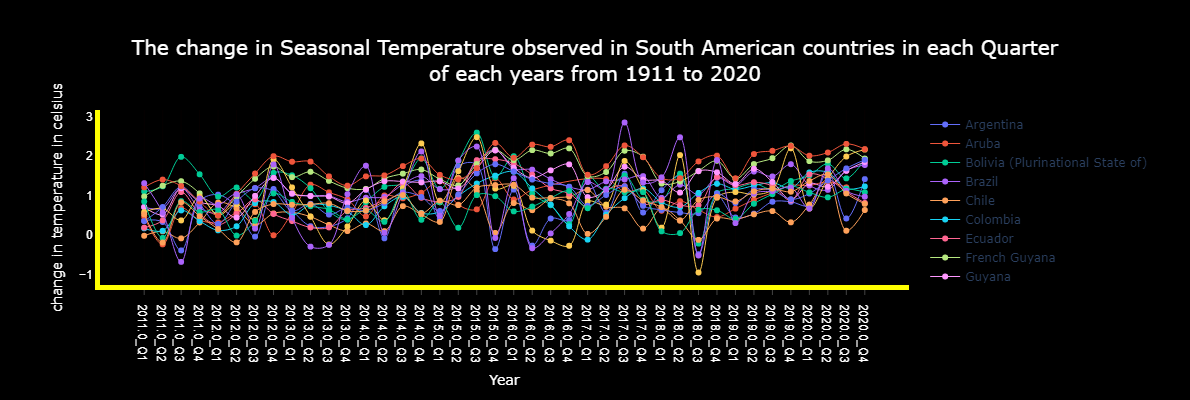

In [155]:
fig = go.Figure()
for i,Area in enumerate( tempSA.Area.unique()):
    AreaWiseFiltered_sorted=tempSA[(tempSA['Area']==Area) & (tempSA['Year'].isin(range(2011,2021)))].sort_values(['QuarterWiseData'])
    fig.add_trace(go.Scatter(x=AreaWiseFiltered_sorted.QuarterWiseData, y=AreaWiseFiltered_sorted.Value,
                    mode='markers+lines',
                    name=Area,
                    line=dict( width=1),
                            connectgaps=True,
                            line_shape='spline'
                            ),)

fig.update_layout(title_text='The change in Seasonal Temperature observed in South American countries in each Quarter<br>of each years from 1911 to 2020',
                    titlefont=dict(
                                    size=20,
                                    color='white'
                                    ),
                    title=dict(x=0.5,xanchor='center'),
                    xaxis_title='Year',
                    
                    yaxis_title='change in temperature in celsius',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=400,
                    width=1190
                    )
               
fig.update_layout(
        xaxis=dict(
                showline=True,
                showgrid=True,
                gridcolor="rgba(255,0,0,0.25)",
                gridwidth=0.1,
                showticklabels=True,
                linecolor='yellow',
                linewidth=5,
                ticks='outside',
                tickfont=dict(
                            family='Arial',
                            size=12,
                            color='white',
                            ),
                titlefont=dict(
                            size=14,
                            color='white'
                            )
                            ),
        yaxis=dict(
            tickfont=dict(
                        family='Arial',
                        size=12,
                        color='white',
                        ),
            titlefont=dict(
                        size=14,
                        color='white'
                        ),
            linecolor='yellow',
            linewidth=5,
            showgrid=False,
            zeroline=False,
            showline=True,
            showticklabels=True,
            gridwidth=0.1,

            ),
            autosize=True,
            margin=dict(
                        autoexpand=True,
                        l=100,
                        r=100,
                        t=110,
                        b=100
                        ),
            showlegend=True,
            
            )                             
                            
fig.show('png')

1. From below heatmap the seasonal change in temperature of southamerican countries are viusalized here.
2. here golden-yellow college represent highest change in temperature.
3. here dark blue represent minimum change in temperature.
4. after 2015 there was high change in temperature in most of the countries in south american.
5. French guyana, and suriname always has seen high change in temperature through out the years from 2011-2019.
6. countrie like Argentina, Chile, Uruguay, has seen lowest (negative) change in temperature most of the time through out the years 

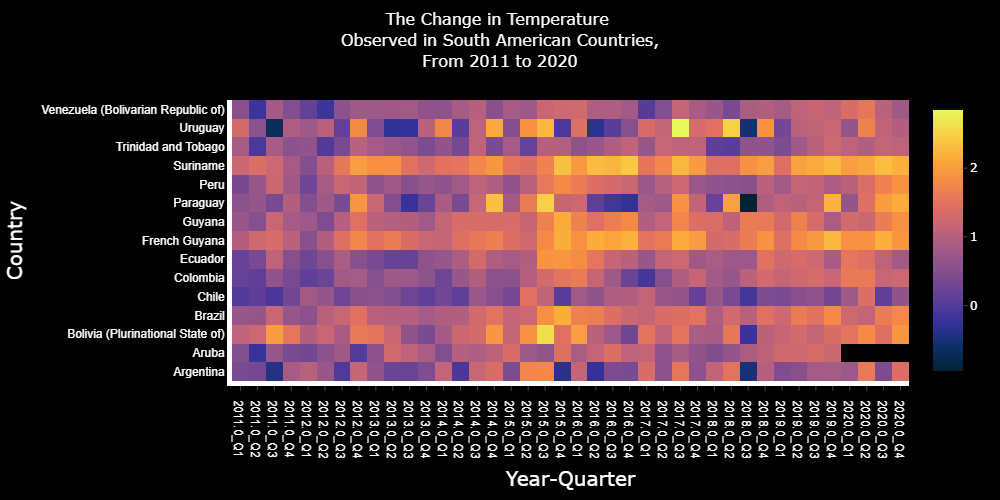

In [156]:
# for heat map
tempSA2011=tempSA[tempSA['Year'].isin(range(2011,2021))]
year=list(tempSA2011.sort_values('QuarterWiseData').QuarterWiseData.unique())
area=list(tempSA2011.sort_values('Area').Area.unique())

tmpChange=[]
for Area in area:
    tmpChange.append(tempSA2011[tempSA2011['Area']==Area].sort_values('QuarterWiseData').Value.values.tolist())
fig = go.Figure(data=go.Heatmap(
                   z=tmpChange,
                   x=year,
                   y=area,
                    type = 'heatmap',
                    hoverongaps = True,
                    colorscale = 'thermal',
                    colorbar=dict(
                    
                    titlefont=dict(
                    color='white',
                        size=12,
                        
                    ),
                    # nticks=10,
                    ticks='outside',
                    ticklen=5,
                    tickwidth=1,
                    showticklabels=True,
                    tickangle=0,
                    tickfont_size=12,
                    tickfont_color='white'
                )

))
fig.update_layout(title="The Change in Temperature <br>Observed in South American Countries,<br>From 2011 to 2020",
                    titlefont=dict(
                                    size=16,
                                    color='white'
                                    ),
                    title_x=0.5, title_y=0.95,
                  
                    xaxis_title='Year-Quarter',
                    yaxis_title='Country',
                    paper_bgcolor='black',
                    plot_bgcolor='black',
                    height=500,
                    width=1000
                    )

fig.update_layout(
xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='white',
        linewidth=5,
        ticks='outside',
        tickfont=dict(
                    family='Arial',
                    size=12,
                    color='white',
                    ),
        titlefont=dict(
                    size=20,
                    color='white'
                    )
                    ),
yaxis=dict(
    tickfont=dict(
                family='Arial',
                size=12,
                color='white',
                ),
    titlefont=dict(
                size=20,
                color='white'
                ),
    linecolor='white',
    linewidth=5,
    showgrid=False,
    zeroline=False,
    showline=True,
    showticklabels=True,
    ),
    autosize=True,
    margin=dict(
                autoexpand=True,
                # l=100,
                # r=30,
                # t=110,
                # b=100
                ),
    showlegend=True,
    # plot_bgcolor="black"
    )
fig.show('png')


### Further Inquires:

* What are the areas with biggest/smallest change in temperature?
* Are there any correlations between the hottest changes and other phenomena (like land coverage, land fires, CO2 emissions etc.)
* How does the seasonal temperature change look like?
* How does this vary by continent? Particularly South America?